In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

dataset = pd.read_csv("dataset.csv")

In [73]:
dataset["creatinine"].fillna(dataset["creatinine"].mean(),inplace = True)
dataset["po2"].fillna(dataset["po2"].mean(),inplace = True)
dataset["fio2"].fillna(dataset["fio2"].mean(),inplace = True)
dataset["pco2"].fillna(dataset["pco2"].mean(),inplace = True)
dataset["bp_min"].fillna(dataset["bp_min"].mean(),inplace = True)
dataset["bp_max"].fillna(dataset["bp_max"].mean(),inplace = True)
dataset["pain"].fillna(dataset["pain"].mean(),inplace = True)
dataset["k"].fillna(dataset["k"].mean(),inplace = True)
dataset["hr_min"].fillna(dataset["hr_min"].mean(),inplace = True)
dataset["hr_max"].fillna(dataset['hr_max'].mean(),inplace = True)
dataset["gcs_min"].fillna(dataset["gcs_min"].mean(),inplace = True)
dataset["gcs_max"].fillna(dataset["gcs_max"].mean(),inplace = True)
dataset["bun"].fillna(dataset["bun"].mean(),inplace = True)
dataset["hco3"].fillna(dataset["hco3"].mean(),inplace = True)
dataset["airway"].fillna(dataset["airway"].mean(),inplace = True)
dataset["resp_min"].fillna(dataset["resp_min"].mean(),inplace = True)
dataset["resp_max"].fillna(dataset["resp_max"].mean(),inplace = True)
dataset["haemoglobin"].fillna(dataset["haemoglobin"].mean(),inplace = True)
dataset["spo2_min"].fillna(dataset["spo2_min"].mean(),inplace = True)
dataset["spo2_max"].fillna(dataset["spo2_max"].mean(),inplace = True)
dataset["temp_min"].fillna(dataset["temp_min"].mean(),inplace = True)
dataset["temp_max"].fillna(dataset["temp_max"].mean(),inplace = True)
dataset["na"].fillna(dataset["na"].mean(),inplace = True)
dataset["outcome"].fillna(1,inplace=True)

In [7]:
features = ['creatinine','po2','fio2','pco2','bp_min','bp_max','pain','k','hr_min','hr_max','gcs_min','gcs_max','bun','hco3','airway','resp_min','resp_max','haemoglobin','spo2_min','spo2_max','temp_min','temp_max','na']

x = dataset[features]
y= dataset['outcome']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

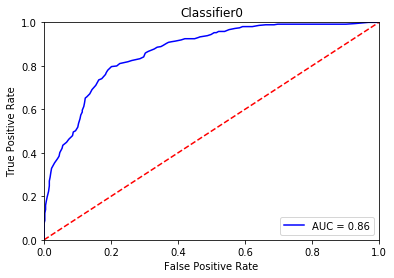

In [8]:
rf0 = RandomForestClassifier()
rf0.fit(xtrain,ytrain)
y_pred0=rf0.predict(xtest)

from sklearn.metrics import roc_auc_score,roc_curve
fpr, tpr, threshold = metrics.roc_curve(ytest, rf0.predict_proba(xtest)[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.title('Classifier0')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [9]:
import math
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [15]:
from sklearn.model_selection import StratifiedKFold

rf = RandomForestClassifier(random_state=0)
kfold = StratifiedKFold(n_splits=10, shuffle = True,random_state=0)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions = random_grid, n_iter=100, cv=kfold, verbose=2,refit=True,n_jobs=-1,scoring='roc_auc',random_state=0)
rf_random.fit(xtrain, ytrain)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.5min
//anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 18.5min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
                   estimator=RandomForestClassifier(random_state=0), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0, scoring='roc_auc', verbose=2)

In [16]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

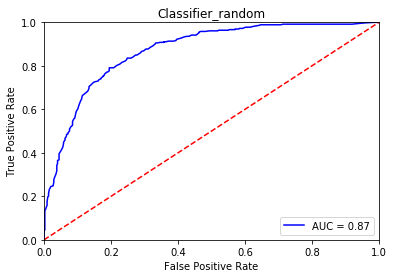

In [17]:
from sklearn.metrics import roc_auc_score,roc_curve
fpr, tpr, threshold = metrics.roc_curve(ytest, rf_random.predict_proba(xtest)[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.title('Classifier_random')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

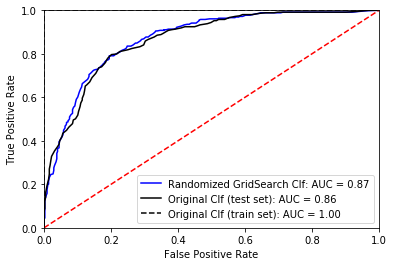

In [18]:
fpr, tpr, threshold = metrics.roc_curve(ytest, rf_random.predict_proba(xtest)[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'Randomized GridSearch Clf: AUC = %0.2f' % roc_auc)

fpr, tpr, threshold = metrics.roc_curve(ytest, rf0.predict_proba(xtest)[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'k', label = 'Original Clf (test set): AUC = %0.2f' % roc_auc)

fpr, tpr, threshold = metrics.roc_curve(ytrain, rf0.predict_proba(xtrain)[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'k--', label = 'Original Clf (train set): AUC = %0.2f' % roc_auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred0)
print ("Original Confusion Matrix: \n", cm)
from sklearn.metrics import accuracy_score
print ("Original Accuracy: ", accuracy_score(ytest, y_pred0))
from sklearn.metrics import precision_score, recall_score, f1_score
print ('Original Precision:',precision_score(ytest,y_pred0))
print ('Original recall:',recall_score(ytest,y_pred0))
print ('Original f1:',f1_score(ytest,y_pred0))

Original Confusion Matrix: 
 [[357  90]
 [ 73 286]]
Original Accuracy:  0.7977667493796526
Original Precision: 0.7606382978723404
Original recall: 0.7966573816155988
Original f1: 0.7782312925170068


In [21]:
rgrid_pred=rf_random.predict(xtest)
cm1 = confusion_matrix(ytest,rgrid_pred)
print ("Randomized GSCV Confusion Matrix: \n", cm1)
print ("Randomized GSCV Accuracy: ", accuracy_score(ytest, rgrid_pred))
print ('Randomized GSCV Precision:',precision_score(ytest, rgrid_pred))
print ('Randomized GSCV Recall:',recall_score(ytest, rgrid_pred))
print ('Randomized GSCV f1:',f1_score(ytest,rgrid_pred))

Randomized GSCV Confusion Matrix: 
 [[360  87]
 [ 75 284]]
Randomized GSCV Accuracy:  0.7990074441687345
Randomized GSCV Precision: 0.7654986522911051
Randomized GSCV Recall: 0.7910863509749304
Randomized GSCV f1: 0.7780821917808219


In [22]:

threshold = 0.65
y_pred4_proba=rf_random.predict_proba(xtest)
y_pred4 = (y_pred4_proba[:,1]>=threshold).astype('int')


In [23]:
print ("Randomized GSCV Accuracy (threshold=0.7): ", accuracy_score(ytest, y_pred4))
print ('Randomized GSCV Precision (threshold=0.7):',precision_score(ytest, y_pred4))
print ('Randomized GSCV Recall (threshold=0.7):',recall_score(ytest, y_pred4))
print ('Randomized GSCV f1 (threshold=0.7):',f1_score(ytest,y_pred4))

Randomized GSCV Accuracy (threshold=0.7):  0.7642679900744417
Randomized GSCV Precision (threshold=0.7): 0.8313725490196079
Randomized GSCV Recall (threshold=0.7): 0.5905292479108635
Randomized GSCV f1 (threshold=0.7): 0.6905537459283387


In [27]:
rf3 = RandomForestClassifier(n_estimators=200,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth=None,bootstrap=False)
rf3.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=False, n_estimators=200)

In [28]:
instance=xtest.to_numpy()[5:6,:]
prediction, bias, contributions = ti.predict(rf3, instance)
print ('Prediction', prediction)
print ('Bias (trainset prior)', bias)
print ('Feature contributions:')
for c, feature in zip(contributions[0], features):
    print (feature, c)

Prediction [[0.91 0.09]]
Bias (trainset prior) [[0.53025132 0.46974868]]
Feature contributions:
creatinine [ 0.00044286 -0.00044286]
po2 [-0.0256882  0.0256882]
fio2 [-0.01409542  0.01409542]
pco2 [ 0.00578317 -0.00578317]
bp_min [ 0.00653042 -0.00653042]
bp_max [ 0.0009158 -0.0009158]
pain [-0.00155209  0.00155209]
k [ 0.01396064 -0.01396064]
hr_min [ 0.01151973 -0.01151973]
hr_max [ 0.00607891 -0.00607891]
gcs_min [ 0.10247992 -0.10247992]
gcs_max [ 0.123206 -0.123206]
bun [ 0.02498749 -0.02498749]
hco3 [ 0.0057849 -0.0057849]
airway [ 0.15760632 -0.15760632]
resp_min [-0.00501156  0.00501156]
resp_max [-0.01863561  0.01863561]
haemoglobin [ 0.03039046 -0.03039046]
spo2_min [ 0.00378274 -0.00378274]
spo2_max [ 0.00122328 -0.00122328]
temp_min [ 0.00070206 -0.00070206]
temp_max [-0.00445876  0.00445876]
na [-0.04620441  0.04620441]


In [109]:
def rf_explain(case):
    prediction, bias, contributions = ti.predict(rf3, case)
    data = [prediction[0][1],bias[0][1]]
    for c in contributions[0]:
        data.append(c[1])
    columns = ['prediction','bias']
    for feature,c in zip(features,contributions[0]):
        columns.append(feature)
    rf_explain={}
    for c,each_datavalue in zip(columns,data):
        rf_explain[c] = each_datavalue
    rf_explain_df = pd.DataFrame.from_dict(rf_explain,orient='index')
    return rf_explain_df

In [130]:
xtest.head(10)

,creatinine,po2,fio2,pco2,bp_min,bp_max,pain,k,hr_min,hr_max,...,hco3,airway,resp_min,resp_max,haemoglobin,spo2_min,spo2_max,temp_min,temp_max,na
3857,68.0,9.531493,29.755798,5.611157,110.00000,133.000000,0.000000,5.2,83.0,109.0,...,26.865539,1.0,29.0,44.0,96.0,92.000000,97.000000,36.7,36.7,137.0
3846,353.0,12.500000,1.000000,7.800000,117.00000,122.000000,0.000000,5.1,108.0,114.0,...,24.800000,0.0,18.0,21.0,71.0,97.000000,99.000000,36.7,36.8,138.0
3955,87.0,4.500000,35.000000,6.400000,112.00000,140.000000,0.000000,4.5,78.0,90.0,...,29.000000,0.0,19.0,26.0,89.0,93.000000,99.000000,37.1,37.1,137.0
1939,63.0,11.600000,29.755798,5.500000,117.89907,137.871979,4.000000,4.4,69.0,80.0,...,28.800000,0.0,13.0,19.0,83.0,94.582953,97.500761,37.4,37.4,144.0
1949,72.0,10.200000,21.000000,4.900000,117.89907,137.871979,7.000000,4.9,88.0,111.0,...,26.800000,0.0,14.0,18.0,103.0,100.000000,100.000000,37.6,37.9,135.0
2969,73.0,17.000000,28.000000,5.200000,116.00000,133.000000,0.000000,5.4,79.0,88.0,...,30.200000,1.0,18.0,21.0,94.0,94.000000,100.000000,36.3,36.7,132.0
1570,150.0,5.300000,29.755798,5.600000,146.00000,155.000000,0.000000,3.9,101.0,123.0,...,21.900000,0.0,13.0,17.0,82.0,97.000000,99.000000,36.9,37.0,140.0
3262,142.0,10.600000,29.755798,5.900000,104.00000,155.000000,3.000000,5.0,80.0,93.0,...,18.900000,0.0,15.0,27.0,101.0,71.000000,95.000000,35.3,35.7,125.0
1529,48.0,15.100000,23.000000,5.000000,127.00000,127.000000,0.000000,4.8,65.0,65.0,...,28.100000,0.0,16.0,16.0,130.0,96.000000,96.000000,37.4,37.4,139.0
1312,40.0,9.400000,21.000000,4.400000,146.00000,150.000000,1.243743,4.9,67.0,75.0,...,23.900000,0.0,17.0,19.0,109.0,95.000000,97.000000,37.0,37.0,132.0


In [131]:
ytest.head(10)

3857    0.0
3846    0.0
3955    0.0
1939    1.0
1949    1.0
2969    0.0
1570    1.0
3262    0.0
1529    1.0
1312    1.0
Name: outcome, dtype: float64

In [110]:
instance1 = xtest.to_numpy()[5:6,:]
df1 = rf_explain(instance1)
print(df1)

                    0
prediction   0.090000
bias         0.469749
creatinine  -0.000443
po2          0.025688
fio2         0.014095
pco2        -0.005783
bp_min      -0.006530
bp_max      -0.000916
pain         0.001552
k           -0.013961
hr_min      -0.011520
hr_max      -0.006079
gcs_min     -0.102480
gcs_max     -0.123206
bun         -0.024987
hco3        -0.005785
airway      -0.157606
resp_min     0.005012
resp_max     0.018636
haemoglobin -0.030390
spo2_min    -0.003783
spo2_max    -0.001223
temp_min    -0.000702
temp_max     0.004459
na           0.046204


In [127]:
instance2=xtest.to_numpy()[8:9,:]
df2 = rf_explain(instance2)
print(df2)

                    0
prediction   0.950000
bias         0.469749
creatinine   0.000039
po2          0.005856
fio2         0.030610
pco2        -0.004064
bp_min       0.003736
bp_max       0.004851
pain         0.001114
k           -0.009016
hr_min       0.025982
hr_max       0.034406
gcs_min      0.044577
gcs_max      0.042903
bun          0.049375
hco3        -0.009458
airway       0.063544
resp_min     0.012047
resp_max     0.061417
haemoglobin  0.094008
spo2_min     0.012235
spo2_max    -0.004836
temp_min     0.000336
temp_max     0.005981
na           0.014607


In [128]:
def compare_two_patients(df1,df2):
    x_data=features
    y1_data=df1.iloc[2:,0:1]
    y2_data=df2.iloc[2:,0:1]
    prediction1 = df1.iloc[0:1,0:1].to_numpy()
    prediction2 = df2.iloc[0:1,0:1].to_numpy()
    bias1 = df1.iloc[1:2,0:1].to_numpy()
    bias2 = df2.iloc[1:2,0:1].to_numpy()
    
    plt.title('Effects of Factor for Patients Discharge')
    
    plt.plot(x_data, y1_data, 'r', label = 'Patient1 (p to discharge: %0.3f bias: %0.3f)' % (prediction1,bias1))
    plt.plot(x_data, y2_data, 'black', label = 'Patient 2 (p to discharge: %0.3f bias: %0.3f)' % (prediction2,bias2))
    plt.legend(loc='lower left')
    
    plt.xticks(rotation=-90)
    plt.grid(b=True, 
         color='r', 
         linestyle='--', 
         linewidth=1, 
         alpha=0.3, 
         axis='both',
         which="major")
    plt.show()

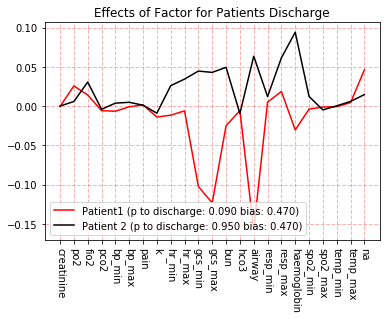

In [129]:
compare_two_patients(df1,df2)

In [120]:
def visualize_one_patient(df1):
    x_data=features
    y1_data=df1.iloc[2:,0:1]
    prediction1 = df1.iloc[0:1,0:1].to_numpy()
    bias1 = df1.iloc[1:2,0:1].to_numpy()
    
    plt.title('Effects of Factor for A Patient Discharge')
    
    plt.plot(x_data, y1_data, 'black', label = 'Patient (p to discharge: %0.3f bias: %0.3f)' % (prediction1,bias1))
    plt.legend(loc='lower left')
    
    plt.xticks(rotation=-90)
    plt.grid(b=True, 
         color='r', 
         linestyle='--', 
         linewidth=1, 
         alpha=0.3, 
         axis='both',
         which="major")
    plt.show()

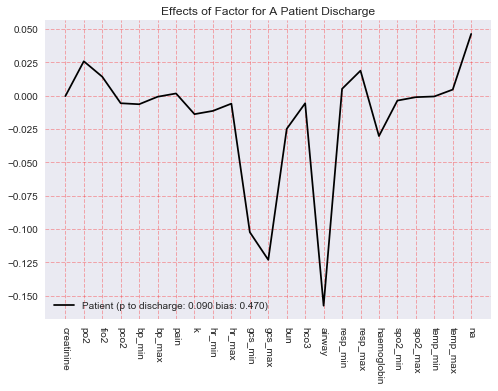

[[150.           5.3         29.75579761   5.6        146.
  155.           0.           3.9        101.         123.
   15.          15.           7.2         21.9          0.
   13.          17.          82.          97.          99.
   36.9         37.         140.        ]]


In [476]:
visualize_1(df1)
print(instance1)

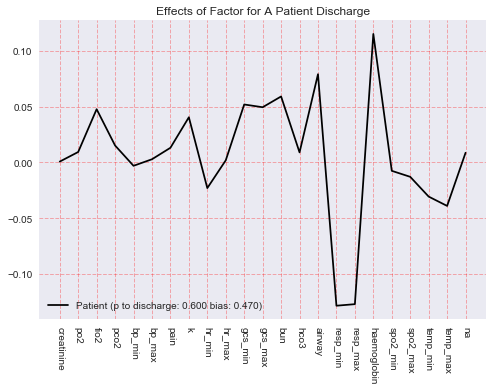

[[ 58.           9.53149338  29.75579761   5.61115665 138.
  138.           7.           3.8         91.          91.
   15.          15.           4.6         26.86553875   0.
   29.          29.         127.          92.          92.
   38.3         38.3        138.        ]]


In [471]:
instance3=xtest.to_numpy()[120:121,:]
df3 = rf_explain(instance3)
visualize_1(df3)
print(instance3)

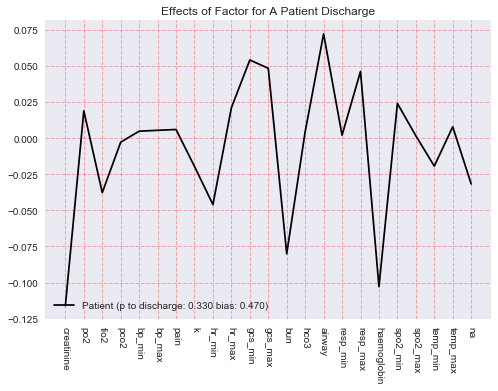

[[299.    5.2  32.    6.9 122.  122.    2.    5.3  86.   86.   15.   15.
   10.5  25.    0.   20.   21.   66.   98.   99.   37.3  37.3 134. ]]


In [472]:
instance3=xtest.to_numpy()[121:122,:]
df3 = rf_explain(instance3)
visualize_1(df3)
print(instance3)

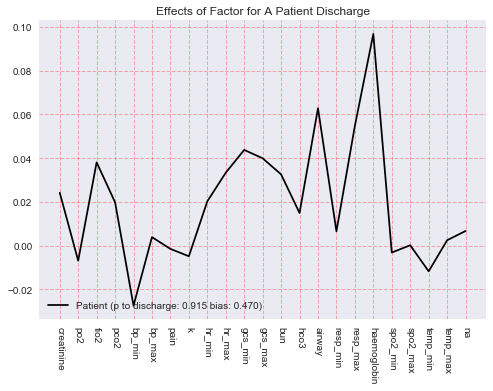

[[ 69.           5.6         29.75579761   5.8         80.
  116.           0.           4.7         46.          68.
   15.          15.           2.3         26.7          0.
   15.          18.         135.         100.         100.
   36.          36.1        140.        ]]


In [473]:
instance3=xtest.to_numpy()[122:123,:]
df3 = rf_explain(instance3)
visualize_1(df3)
print(instance3)

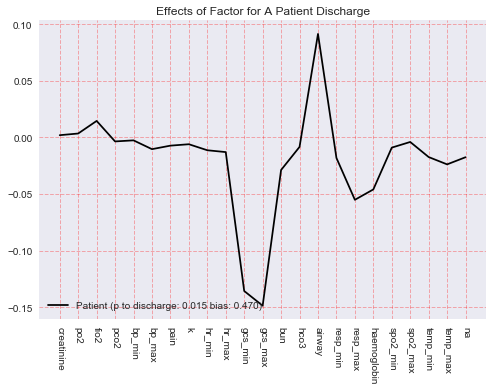

[[ 41.           7.5         25.           3.6        125.
  154.           1.24374289   4.8        101.         104.
    4.           4.           7.6         24.5          0.
   32.          38.          84.          92.          98.
   37.9         37.9        144.        ]]


In [474]:
instance3=xtest.to_numpy()[123:124,:]
df3 = rf_explain(instance3)
visualize_1(df3)
print(instance3) 

In [ ]:
print('Data Transparency: ')

In [78]:
dataset_withNa = pd.read_csv("dataset.csv")
x_withNa = dataset_withNa[features]
y_withNa = dataset_withNa['outcome']

y_withNa_2d = y_withNa.to_numpy().reshape((3957,1))
import fatf.utils.data.tools as fatf_data_tools

target_grouping_num_cat = fatf_data_tools.group_by_column(y_withNa_2d, 0, treat_as_categorical=True)


In [183]:
creatinine_index=0
from pprint import pprint
import fatf.transparency.data.describe_functions as fatf_describe_data
creatinine_desc=fatf_describe_data.describe_array(dataset_withNa.iloc[:, 0].to_numpy())
pprint(creatinine_desc)

{'25%': 54.0,
 '50%': 69.0,
 '75%': 92.25,
 'count': 3957,
 'max': 988.0,
 'mean': 89.21929375639714,
 'min': 11.0,
 'nan_count': 49,
 'std': 73.34109586161703}


In [184]:
creatinine_class0 = dataset_withNa.iloc[target_grouping_num_cat[0][0],creatinine_index].to_numpy()
creatinine_class0_desc = fatf_describe_data.describe_array(creatinine_class0)
pprint(creatinine_class0_desc)

{'25%': 53.0,
 '50%': 71.0,
 '75%': 100.0,
 'count': 2156,
 'max': 695.0,
 'mean': 94.17572633552015,
 'min': 11.0,
 'nan_count': 22,
 'std': 76.94391481768717}


In [185]:
creatinine_class1 = dataset_withNa.iloc[target_grouping_num_cat[0][1],creatinine_index].to_numpy()
creatinine_class1_desc = fatf_describe_data.describe_array(creatinine_class1)
pprint(creatinine_class1_desc)

{'25%': 54.0,
 '50%': 68.0,
 '75%': 86.0,
 'count': 1801,
 'max': 988.0,
 'mean': 83.25704622322435,
 'min': 13.0,
 'nan_count': 27,
 'std': 68.28242624077635}


In [186]:
po2_index=1
po2_desc=fatf_describe_data.describe_array(dataset_withNa.iloc[:, 1].to_numpy())
pprint(po2_desc)

{'25%': 7.7,
 '50%': 9.6,
 '75%': 11.2,
 'count': 3957,
 'max': 68.1,
 'mean': 9.531493383742912,
 'min': 0.0,
 'nan_count': 254,
 'std': 3.8900726889967765}


In [187]:
po2_class0 = dataset_withNa.iloc[target_grouping_num_cat[0][0],po2_index].to_numpy()
po2_class0_desc = fatf_describe_data.describe_array(po2_class0)
pprint(po2_class0_desc)

{'25%': 8.2,
 '50%': 9.8,
 '75%': 11.3,
 'count': 2156,
 'max': 60.5,
 'mean': 9.795582882439744,
 'min': 0.0,
 'nan_count': 123,
 'std': 3.705104861348455}


In [188]:
po2_class1 = dataset_withNa.iloc[target_grouping_num_cat[0][1],po2_index].to_numpy()
po2_class1_desc = fatf_describe_data.describe_array(po2_class1)
pprint(po2_class1_desc)

{'25%': 6.0,
 '50%': 9.4,
 '75%': 11.1,
 'count': 1801,
 'max': 68.1,
 'mean': 9.21,
 'min': 2.4,
 'nan_count': 131,
 'std': 4.081009253474697}


In [189]:
fio2_index=2
fio2_desc=fatf_describe_data.describe_array(dataset_withNa.iloc[:, 2].to_numpy())
pprint(fio2_desc)

{'25%': 24.0,
 '50%': 28.0,
 '75%': 35.0,
 'count': 3957,
 'max': 100.0,
 'mean': 29.755797610681658,
 'min': 0.0,
 'nan_count': 1111,
 'std': 14.919334276578759}


In [190]:
fio2_class0 = dataset_withNa.iloc[target_grouping_num_cat[0][0],fio2_index].to_numpy()
fio2_class0_desc = fatf_describe_data.describe_array(fio2_class0)
pprint(fio2_class0_desc)

{'25%': 25.0,
 '50%': 30.0,
 '75%': 40.0,
 'count': 2156,
 'max': 100.0,
 'mean': 32.712035995500564,
 'min': 0.0,
 'nan_count': 378,
 'std': 14.590367764822279}


In [191]:
fio2_class1 = dataset_withNa.iloc[target_grouping_num_cat[0][1],fio2_index].to_numpy()
fio2_class1_desc = fatf_describe_data.describe_array(fio2_class1)
pprint(fio2_class1_desc)

{'25%': 21.0,
 '50%': 28.0,
 '75%': 30.0,
 'count': 1801,
 'max': 100.0,
 'mean': 24.834269662921347,
 'min': 0.0,
 'nan_count': 733,
 'std': 14.141330033038331}


In [192]:
pco2_index=3
pco2_desc=fatf_describe_data.describe_array(dataset_withNa.iloc[:, 3].to_numpy())
pprint(pco2_desc)

{'25%': 4.8,
 '50%': 5.5,
 '75%': 6.2,
 'count': 3957,
 'max': 12.8,
 'mean': 5.611156645996225,
 'min': 0.0,
 'nan_count': 248,
 'std': 1.1487536164865177}


In [193]:
pco2_class0 = dataset_withNa.iloc[target_grouping_num_cat[0][0],pco2_index].to_numpy()
pco2_class0_desc = fatf_describe_data.describe_array(pco2_class0)
pprint(pco2_class0_desc)

{'25%': 4.7,
 '50%': 5.4,
 '75%': 6.2,
 'count': 2156,
 'max': 12.8,
 'mean': 5.549190779794016,
 'min': 0.0,
 'nan_count': 117,
 'std': 1.2096131144314455}


In [194]:
pco2_class1 = dataset_withNa.iloc[target_grouping_num_cat[0][1],pco2_index].to_numpy()
pco2_class1_desc = fatf_describe_data.describe_array(pco2_class1)
pprint(pco2_class1_desc)

{'25%': 5.0,
 '50%': 5.6,
 '75%': 6.3,
 'count': 1801,
 'max': 10.9,
 'mean': 5.686814371257484,
 'min': 3.0,
 'nan_count': 131,
 'std': 1.064884816366914}


In [195]:
bpmin_index=4
bpmin_desc=fatf_describe_data.describe_array(dataset_withNa.iloc[:, 4].to_numpy())
pprint(bpmin_desc)

{'25%': 101.0,
 '50%': 116.0,
 '75%': 134.0,
 'count': 3957,
 'max': 242.0,
 'mean': 117.89907038512617,
 'min': 39.0,
 'nan_count': 192,
 'std': 23.513741831378276}


In [196]:
bpmin_class0 = dataset_withNa.iloc[target_grouping_num_cat[0][0],bpmin_index].to_numpy()
bpmin_class0_desc = fatf_describe_data.describe_array(bpmin_class0)
pprint(bpmin_class0_desc)

{'25%': 99.0,
 '50%': 112.0,
 '75%': 131.0,
 'count': 2156,
 'max': 242.0,
 'mean': 115.534219596258,
 'min': 39.0,
 'nan_count': 125,
 'std': 23.28782266041534}


In [197]:
bpmin_class1 = dataset_withNa.iloc[target_grouping_num_cat[0][1],bpmin_index].to_numpy()
bpmin_class1_desc = fatf_describe_data.describe_array(bpmin_class1)
pprint(bpmin_class1_desc)

{'25%': 104.0,
 '50%': 119.0,
 '75%': 136.0,
 'count': 1801,
 'max': 206.0,
 'mean': 120.66897347174164,
 'min': 43.0,
 'nan_count': 67,
 'std': 23.474617458129632}


In [198]:
bpmax_index=5
bpmax_desc=fatf_describe_data.describe_array(dataset_withNa.iloc[:, 5].to_numpy())
pprint(bpmax_desc)

{'25%': 120.0,
 '50%': 136.0,
 '75%': 154.0,
 'count': 3957,
 'max': 242.0,
 'mean': 137.87197875166004,
 'min': 47.0,
 'nan_count': 192,
 'std': 24.181047388213962}


In [199]:
bpmax_class0 = dataset_withNa.iloc[target_grouping_num_cat[0][0],bpmax_index].to_numpy()
bpmax_class0_desc = fatf_describe_data.describe_array(bpmax_class0)
pprint(bpmax_class0_desc)

{'25%': 120.0,
 '50%': 137.0,
 '75%': 155.0,
 'count': 2156,
 'max': 242.0,
 'mean': 138.26489414081732,
 'min': 47.0,
 'nan_count': 125,
 'std': 24.651420031666863}


In [200]:
bpmax_class1 = dataset_withNa.iloc[target_grouping_num_cat[0][1],bpmax_index].to_numpy()
bpmax_class1_desc = fatf_describe_data.describe_array(bpmax_class1)
pprint(bpmax_class1_desc)

{'25%': 120.0,
 '50%': 135.0,
 '75%': 153.0,
 'count': 1801,
 'max': 222.0,
 'mean': 137.41176470588235,
 'min': 81.0,
 'nan_count': 67,
 'std': 23.609886889582288}


In [201]:
pain_index=6
pain_desc=fatf_describe_data.describe_array(dataset_withNa.iloc[:, 6].to_numpy())
pprint(pain_desc)

{'25%': 0.0,
 '50%': 0.0,
 '75%': 2.0,
 'count': 3957,
 'max': 10.0,
 'mean': 1.2437428896473266,
 'min': 0.0,
 'nan_count': 441,
 'std': 2.0657640747723565}


In [202]:
pain_class0 = dataset_withNa.iloc[target_grouping_num_cat[0][0],pain_index].to_numpy()
pain_class0_desc = fatf_describe_data.describe_array(pain_class0)
pprint(pain_class0_desc)

{'25%': 0.0,
 '50%': 0.0,
 '75%': 2.0,
 'count': 2156,
 'max': 10.0,
 'mean': 1.1048158640226629,
 'min': 0.0,
 'nan_count': 391,
 'std': 2.0621517221826187}


In [203]:
pain_class1 = dataset_withNa.iloc[target_grouping_num_cat[0][1],pain_index].to_numpy()
pain_class1_desc = fatf_describe_data.describe_array(pain_class1)
pprint(pain_class1_desc)

{'25%': 0.0,
 '50%': 0.0,
 '75%': 2.0,
 'count': 1801,
 'max': 10.0,
 'mean': 1.3837806967447173,
 'min': 0.0,
 'nan_count': 50,
 'std': 2.0599384214773124}


In [204]:
k_index=7
k_desc=fatf_describe_data.describe_array(dataset_withNa.iloc[:, 7].to_numpy())
pprint(k_desc)

{'25%': 4.3,
 '50%': 4.6,
 '75%': 4.8,
 'count': 3957,
 'max': 8.0,
 'mean': 4.567425210943492,
 'min': 2.3,
 'nan_count': 46,
 'std': 0.4506621656989668}


In [205]:
k_class0 = dataset_withNa.iloc[target_grouping_num_cat[0][0],k_index].to_numpy()
k_class0_desc = fatf_describe_data.describe_array(k_class0)
pprint(k_class0_desc)

{'25%': 4.3,
 '50%': 4.6,
 '75%': 4.9,
 'count': 2156,
 'max': 6.7,
 'mean': 4.618518518518518,
 'min': 3.1,
 'nan_count': 23,
 'std': 0.42904320033493376}


In [206]:
k_class1 = dataset_withNa.iloc[target_grouping_num_cat[0][1],k_index].to_numpy()
k_class1_desc = fatf_describe_data.describe_array(k_class1)
pprint(k_class1_desc)

{'25%': 4.2,
 '50%': 4.5,
 '75%': 4.8,
 'count': 1801,
 'max': 8.0,
 'mean': 4.506130483689539,
 'min': 2.3,
 'nan_count': 23,
 'std': 0.4679991021112449}


In [207]:
hrmin_index=8
hrmin_desc=fatf_describe_data.describe_array(dataset_withNa.iloc[:, 8].to_numpy())
pprint(hrmin_desc)

{'25%': 69.0,
 '50%': 79.0,
 '75%': 90.0,
 'count': 3957,
 'max': 133.0,
 'mean': 79.51545869234668,
 'min': 0.0,
 'nan_count': 11,
 'std': 15.440528592583545}


In [208]:
hrmin_class0 = dataset_withNa.iloc[target_grouping_num_cat[0][0],hrmin_index].to_numpy()
hrmin_class0_desc = fatf_describe_data.describe_array(hrmin_class0)
pprint(hrmin_class0_desc)

{'25%': 70.0,
 '50%': 81.0,
 '75%': 92.0,
 'count': 2156,
 'max': 128.0,
 'mean': 81.72871102838529,
 'min': 0.0,
 'nan_count': 7,
 'std': 15.613539460532238}


In [209]:
hrmin_class1 = dataset_withNa.iloc[target_grouping_num_cat[0][1],hrmin_index].to_numpy()
hrmin_class1_desc = fatf_describe_data.describe_array(hrmin_class1)
pprint(hrmin_class1_desc)

{'25%': 67.0,
 '50%': 76.0,
 '75%': 86.0,
 'count': 1801,
 'max': 133.0,
 'mean': 76.86867000556484,
 'min': 0.0,
 'nan_count': 4,
 'std': 14.802746931105434}


In [210]:
hrmax_index=9
hrmax_desc=fatf_describe_data.describe_array(dataset_withNa.iloc[:, 9].to_numpy())
pprint(hrmax_desc)

{'25%': 78.0,
 '50%': 89.0,
 '75%': 101.0,
 'count': 3957,
 'max': 190.0,
 'mean': 90.37075519513431,
 'min': 38.0,
 'nan_count': 11,
 'std': 17.753711412484137}


In [211]:
hrmax_class0 = dataset_withNa.iloc[target_grouping_num_cat[0][0],hrmax_index].to_numpy()
hrmax_class0_desc = fatf_describe_data.describe_array(hrmax_class0)
pprint(hrmax_class0_desc)

{'25%': 81.0,
 '50%': 93.0,
 '75%': 105.0,
 'count': 2156,
 'max': 190.0,
 'mean': 93.92182410423453,
 'min': 46.0,
 'nan_count': 7,
 'std': 18.419278781430744}


In [212]:
hrmax_class1 = dataset_withNa.iloc[target_grouping_num_cat[0][1],hrmax_index].to_numpy()
hrmax_class1_desc = fatf_describe_data.describe_array(hrmax_class1)
pprint(hrmax_class1_desc)

{'25%': 75.0,
 '50%': 85.0,
 '75%': 96.0,
 'count': 1801,
 'max': 151.0,
 'mean': 86.12409571508068,
 'min': 38.0,
 'nan_count': 4,
 'std': 15.915038171062825}


In [213]:
gcsmin_index=10
gcsmin_desc=fatf_describe_data.describe_array(dataset_withNa.iloc[:, 10].to_numpy())
pprint(gcsmin_desc)

{'25%': 11.0,
 '50%': 15.0,
 '75%': 15.0,
 'count': 3957,
 'max': 15.0,
 'mean': 12.932775240994419,
 'min': 3.0,
 'nan_count': 15,
 'std': 3.508747691119288}


In [214]:
gcsmin_class0 = dataset_withNa.iloc[target_grouping_num_cat[0][0],gcsmin_index].to_numpy()
gcsmin_class0_desc = fatf_describe_data.describe_array(gcsmin_class0)
pprint(gcsmin_class0_desc)

{'25%': 10.0,
 '50%': 14.0,
 '75%': 15.0,
 'count': 2156,
 'max': 15.0,
 'mean': 11.533271288971616,
 'min': 3.0,
 'nan_count': 7,
 'std': 4.087506706568128}


In [215]:
gcsmin_class1 = dataset_withNa.iloc[target_grouping_num_cat[0][1],gcsmin_index].to_numpy()
gcsmin_class1_desc = fatf_describe_data.describe_array(gcsmin_class1)
pprint(gcsmin_class1_desc)

{'25%': 15.0,
 '50%': 15.0,
 '75%': 15.0,
 'count': 1801,
 'max': 15.0,
 'mean': 14.610150585610707,
 'min': 3.0,
 'nan_count': 8,
 'std': 1.3714675273817143}


In [216]:
gcsmax_index=11
gcsmax_desc=fatf_describe_data.describe_array(dataset_withNa.iloc[:, 11].to_numpy())
pprint(gcsmax_desc)

{'25%': 11.0,
 '50%': 15.0,
 '75%': 15.0,
 'count': 3957,
 'max': 15.0,
 'mean': 13.162100456621005,
 'min': 3.0,
 'nan_count': 15,
 'std': 3.228465235183622}


In [217]:
gcsmax_class0 = dataset_withNa.iloc[target_grouping_num_cat[0][0],gcsmax_index].to_numpy()
gcsmax_class0_desc = fatf_describe_data.describe_array(gcsmax_class0)
pprint(gcsmax_class0_desc)

{'25%': 10.0,
 '50%': 14.0,
 '75%': 15.0,
 'count': 2156,
 'max': 15.0,
 'mean': 11.894369474174034,
 'min': 3.0,
 'nan_count': 7,
 'std': 3.7935939409303328}


In [218]:
gcsmax_class1 = dataset_withNa.iloc[target_grouping_num_cat[0][1],gcsmax_index].to_numpy()
gcsmax_class1_desc = fatf_describe_data.describe_array(gcsmax_class1)
pprint(gcsmax_class1_desc)

{'25%': 15.0,
 '50%': 15.0,
 '75%': 15.0,
 'count': 1801,
 'max': 15.0,
 'mean': 14.68153931957613,
 'min': 3.0,
 'nan_count': 8,
 'std': 1.1965648339426511}


In [219]:
bun_index=12
bun_desc=fatf_describe_data.describe_array(dataset_withNa.iloc[:, 12].to_numpy())
pprint(bun_desc)

{'25%': 4.5,
 '50%': 6.6,
 '75%': 9.8,
 'count': 3957,
 'max': 42.6,
 'mean': 7.962295501022495,
 'min': 0.5,
 'nan_count': 45,
 'std': 5.315776683137656}


In [220]:
bun_class0 = dataset_withNa.iloc[target_grouping_num_cat[0][0],bun_index].to_numpy()
bun_class0_desc = fatf_describe_data.describe_array(bun_class0)
pprint(bun_class0_desc)

{'25%': 5.4,
 '50%': 7.6,
 '75%': 11.0,
 'count': 2156,
 'max': 42.6,
 'mean': 9.058434864104967,
 'min': 0.6,
 'nan_count': 22,
 'std': 5.685595800987378}


In [221]:
bun_class1 = dataset_withNa.iloc[target_grouping_num_cat[0][1],bun_index].to_numpy()
bun_class1_desc = fatf_describe_data.describe_array(bun_class1)
pprint(bun_class1_desc)

{'25%': 3.9,
 '50%': 5.5,
 '75%': 8.0,
 'count': 1801,
 'max': 39.8,
 'mean': 6.646681664791901,
 'min': 0.5,
 'nan_count': 23,
 'std': 4.494597771061898}


In [222]:
hco3_index=13
bun_desc=fatf_describe_data.describe_array(dataset_withNa.iloc[:, 13].to_numpy())
pprint(bun_desc)

{'25%': 24.9,
 '50%': 26.7,
 '75%': 28.6,
 'count': 3957,
 'max': 41.3,
 'mean': 26.86553875236295,
 'min': 0.0,
 'nan_count': 254,
 'std': 3.157391804705688}


In [223]:
hco3_class0 = dataset_withNa.iloc[target_grouping_num_cat[0][0],hco3_index].to_numpy()
hco3_class0_desc = fatf_describe_data.describe_array(hco3_class0)
pprint(hco3_class0_desc)

{'25%': 24.9,
 '50%': 26.9,
 '75%': 29.0,
 'count': 2156,
 'max': 41.3,
 'mean': 27.100049188391537,
 'min': 0.0,
 'nan_count': 123,
 'std': 3.41447037856531}


In [224]:
hco3_class1 = dataset_withNa.iloc[target_grouping_num_cat[0][1],hco3_index].to_numpy()
hco3_class1_desc = fatf_describe_data.describe_array(hco3_class1)
pprint(hco3_class1_desc)

{'25%': 24.8,
 '50%': 26.5,
 '75%': 28.2,
 'count': 1801,
 'max': 38.1,
 'mean': 26.58005389221557,
 'min': 13.3,
 'nan_count': 131,
 'std': 2.7863868922429442}


In [225]:
respmin_index=15
respmin_desc=fatf_describe_data.describe_array(dataset_withNa.iloc[:, 15].to_numpy())
pprint(respmin_desc)

{'25%': 14.0,
 '50%': 17.0,
 '75%': 20.0,
 'count': 3957,
 'max': 45.0,
 'mean': 17.31496062992126,
 'min': 0.0,
 'nan_count': 20,
 'std': 5.388758862432439}


In [226]:
respmin_class0 = dataset_withNa.iloc[target_grouping_num_cat[0][0],respmin_index].to_numpy()
respmin_class0_desc = fatf_describe_data.describe_array(respmin_class0)
pprint(respmin_class0_desc)

{'25%': 15.0,
 '50%': 18.0,
 '75%': 22.0,
 'count': 2156,
 'max': 45.0,
 'mean': 18.44387517466232,
 'min': 0.0,
 'nan_count': 9,
 'std': 5.848179624277462}


In [227]:
respmin_class1 = dataset_withNa.iloc[target_grouping_num_cat[0][1],respmin_index].to_numpy()
respmin_class1_desc = fatf_describe_data.describe_array(respmin_class1)
pprint(respmin_class1_desc)

{'25%': 13.0,
 '50%': 16.0,
 '75%': 18.0,
 'count': 1801,
 'max': 37.0,
 'mean': 15.960893854748603,
 'min': 0.0,
 'nan_count': 11,
 'std': 4.414125533891923}


In [228]:
respmax_index=16
respmax_desc=fatf_describe_data.describe_array(dataset_withNa.iloc[:, 16].to_numpy())
pprint(respmax_desc)

{'25%': 18.0,
 '50%': 21.0,
 '75%': 26.0,
 'count': 3957,
 'max': 60.0,
 'mean': 22.47675895351791,
 'min': 0.0,
 'nan_count': 20,
 'std': 6.522311280207928}


In [229]:
respmax_class0 = dataset_withNa.iloc[target_grouping_num_cat[0][0],respmax_index].to_numpy()
respmax_class0_desc = fatf_describe_data.describe_array(respmax_class0)
pprint(respmax_class0_desc)

{'25%': 20.0,
 '50%': 24.0,
 '75%': 28.0,
 'count': 2156,
 'max': 60.0,
 'mean': 24.591523055426176,
 'min': 0.0,
 'nan_count': 9,
 'std': 6.790317695167747}


In [230]:
respmax_class1 = dataset_withNa.iloc[target_grouping_num_cat[0][1],respmax_index].to_numpy()
respmax_class1_desc = fatf_describe_data.describe_array(respmax_class1)
pprint(respmax_class1_desc)

{'25%': 17.0,
 '50%': 19.0,
 '75%': 22.0,
 'count': 1801,
 'max': 48.0,
 'mean': 19.94022346368715,
 'min': 0.0,
 'nan_count': 11,
 'std': 5.144211038889619}


In [231]:
haemo_index=17
haemo_desc=fatf_describe_data.describe_array(dataset_withNa.iloc[:, 17].to_numpy())
pprint(haemo_desc)

{'25%': 85.0,
 '50%': 97.0,
 '75%': 111.0,
 'count': 3957,
 'max': 246.0,
 'mean': 99.3026113671275,
 'min': 2.0,
 'nan_count': 51,
 'std': 18.49008752696294}


In [232]:
haemo_class0 = dataset_withNa.iloc[target_grouping_num_cat[0][0],haemo_index].to_numpy()
haemo_class0_desc = fatf_describe_data.describe_array(haemo_class0)
pprint(haemo_class0_desc)

{'25%': 83.0,
 '50%': 93.0,
 '75%': 104.0,
 'count': 2156,
 'max': 167.0,
 'mean': 95.39849976558837,
 'min': 2.0,
 'nan_count': 23,
 'std': 17.239022818455577}


In [233]:
haemo_class1 = dataset_withNa.iloc[target_grouping_num_cat[0][1],haemo_index].to_numpy()
haemo_class1_desc = fatf_describe_data.describe_array(haemo_class1)
pprint(haemo_class1_desc)

{'25%': 90.0,
 '50%': 103.0,
 '75%': 117.0,
 'count': 1801,
 'max': 246.0,
 'mean': 103.99943598420755,
 'min': 2.0,
 'nan_count': 28,
 'std': 18.84838727874561}


In [234]:
spo2_index=18
spo2_desc=fatf_describe_data.describe_array(dataset_withNa.iloc[:, 18].to_numpy())
pprint(spo2_desc)

{'25%': 93.0,
 '50%': 95.0,
 '75%': 97.0,
 'count': 3957,
 'max': 100.0,
 'mean': 94.58295281582953,
 'min': 9.0,
 'nan_count': 15,
 'std': 3.5755374979284977}


In [235]:
spo2_class0 = dataset_withNa.iloc[target_grouping_num_cat[0][0],spo2_index].to_numpy()
spo2_class0_desc = fatf_describe_data.describe_array(spo2_class0)
pprint(spo2_class0_desc)

{'25%': 93.0,
 '50%': 95.0,
 '75%': 96.0,
 'count': 2156,
 'max': 100.0,
 'mean': 94.09641360037261,
 'min': 9.0,
 'nan_count': 9,
 'std': 3.965679637912724}


In [236]:
spo2_class1 = dataset_withNa.iloc[target_grouping_num_cat[0][1],spo2_index].to_numpy()
spo2_class1_desc = fatf_describe_data.describe_array(spo2_class1)
pprint(spo2_class1_desc)

{'25%': 94.0,
 '50%': 95.0,
 '75%': 97.0,
 'count': 1801,
 'max': 100.0,
 'mean': 95.16490250696378,
 'min': 78.0,
 'nan_count': 6,
 'std': 2.939993070116586}


In [237]:
spo2max_index=19
spo2max_desc=fatf_describe_data.describe_array(dataset_withNa.iloc[:, 19].to_numpy())
pprint(spo2max_desc)

{'25%': 96.0,
 '50%': 98.0,
 '75%': 100.0,
 'count': 3957,
 'max': 100.0,
 'mean': 97.50076103500761,
 'min': 82.0,
 'nan_count': 15,
 'std': 2.260748480651683}


In [238]:
spo2max_class0 = dataset_withNa.iloc[target_grouping_num_cat[0][0],spo2max_index].to_numpy()
spo2max_class0_desc = fatf_describe_data.describe_array(spo2max_class0)
pprint(spo2max_class0_desc)

{'25%': 96.0,
 '50%': 98.0,
 '75%': 100.0,
 'count': 2156,
 'max': 100.0,
 'mean': 97.50302748020493,
 'min': 82.0,
 'nan_count': 9,
 'std': 2.279363110755884}


In [239]:
spo2max_class1 = dataset_withNa.iloc[target_grouping_num_cat[0][1],spo2max_index].to_numpy()
spo2max_class1_desc = fatf_describe_data.describe_array(spo2max_class1)
pprint(spo2max_class1_desc)

{'25%': 96.0,
 '50%': 98.0,
 '75%': 99.0,
 'count': 1801,
 'max': 100.0,
 'mean': 97.49805013927576,
 'min': 83.0,
 'nan_count': 6,
 'std': 2.2382771895880866}


In [240]:
temp_index=20
temp_desc=fatf_describe_data.describe_array(dataset_withNa.iloc[:, 20].to_numpy())
pprint(temp_desc)

{'25%': 36.6,
 '50%': 37.0,
 '75%': 37.3,
 'count': 3957,
 'max': 39.3,
 'mean': 36.92647730154704,
 'min': 0.0,
 'nan_count': 14,
 'std': 1.189046271039829}


In [241]:
temp_class0 = dataset_withNa.iloc[target_grouping_num_cat[0][0],temp_index].to_numpy()
temp_class0_desc = fatf_describe_data.describe_array(temp_class0)
pprint(temp_class0_desc)

{'25%': 36.6,
 '50%': 37.0,
 '75%': 37.4,
 'count': 2156,
 'max': 39.3,
 'mean': 36.97235923685435,
 'min': 0.0,
 'nan_count': 7,
 'std': 1.0834209256453255}


In [242]:
temp_class1 = dataset_withNa.iloc[target_grouping_num_cat[0][1],temp_index].to_numpy()
temp_class1_desc = fatf_describe_data.describe_array(temp_class1)
pprint(temp_class1_desc)

{'25%': 36.6,
 '50%': 36.9,
 '75%': 37.2,
 'count': 1801,
 'max': 39.3,
 'mean': 36.871516164994425,
 'min': 0.0,
 'nan_count': 7,
 'std': 1.3022351242605843}


In [243]:
tempmax_index=21
tempmax_desc=fatf_describe_data.describe_array(dataset_withNa.iloc[:, 21].to_numpy())
pprint(tempmax_desc)

{'25%': 36.7,
 '50%': 37.1,
 '75%': 37.5,
 'count': 3957,
 'max': 40.0,
 'mean': 37.100405782399186,
 'min': 0.0,
 'nan_count': 14,
 'std': 0.8536920384793711}


In [244]:
tempmax_class0 = dataset_withNa.iloc[target_grouping_num_cat[0][0],tempmax_index].to_numpy()
tempmax_class0_desc = fatf_describe_data.describe_array(tempmax_class0)
pprint(tempmax_class0_desc)

{'25%': 36.8,
 '50%': 37.2,
 '75%': 37.6,
 'count': 2156,
 'max': 40.0,
 'mean': 37.194090274546305,
 'min': 34.0,
 'nan_count': 7,
 'std': 0.6715570021326703}


In [245]:
tempmax_class1 = dataset_withNa.iloc[target_grouping_num_cat[0][1],tempmax_index].to_numpy()
tempmax_class1_desc = fatf_describe_data.describe_array(tempmax_class1)
pprint(tempmax_class1_desc)

{'25%': 36.7,
 '50%': 37.0,
 '75%': 37.3,
 'count': 1801,
 'max': 39.9,
 'mean': 36.988182831661085,
 'min': 0.0,
 'nan_count': 7,
 'std': 1.019046452453568}


In [246]:
na_index=22
na_desc=fatf_describe_data.describe_array(dataset_withNa.iloc[:, 22].to_numpy())
pprint(na_desc)

{'25%': 137.0,
 '50%': 140.0,
 '75%': 143.0,
 'count': 3957,
 'max': 160.0,
 'mean': 139.88266871165644,
 'min': 117.0,
 'nan_count': 45,
 'std': 4.844545162020204}


In [247]:
na_class0 = dataset_withNa.iloc[target_grouping_num_cat[0][0],na_index].to_numpy()
na_class0_desc = fatf_describe_data.describe_array(na_class0)
pprint(na_class0_desc)

{'25%': 137.0,
 '50%': 140.0,
 '75%': 144.0,
 'count': 2156,
 'max': 160.0,
 'mean': 140.53045923149017,
 'min': 117.0,
 'nan_count': 22,
 'std': 5.270362401708146}


In [248]:
na_class1 = dataset_withNa.iloc[target_grouping_num_cat[0][1],na_index].to_numpy()
na_class1_desc = fatf_describe_data.describe_array(na_class1)
pprint(na_class1_desc)

{'25%': 137.0,
 '50%': 139.0,
 '75%': 142.0,
 'count': 1801,
 'max': 155.0,
 'mean': 139.10517435320585,
 'min': 123.0,
 'nan_count': 23,
 'std': 4.1463207155003925}


In [249]:
mean_df = pd.DataFrame({
    'class0':[94.18,9.8,32.71,5.55,115.53,138.26,1.1,4.62,81.73,93.92,11.53,11.89,9.06,27.1,18.44,24.59,95.4,94.1,97.5,36.97,37.19,140.53],
    'class1':[83.26,9.21,24.83,5.69,120.67,137.41,1.38,4.5,76.87,86.12,14.61,14.68,6.65,26.58,15.96,19.94,104,95.16,97.41,36.87,36.99,139.11]
},index = ['creatinine','po2','fio2','pco2','bp_min','bp_max','pain','k','hr_min','hr_max','gcs_min','gcs_max','bun','hco3','resp_min','resp_max','haemoglobin','spo2_min','spo2_max','temp_min','temp_max','na'])

In [250]:
def visualize_feature_mean(mean_df):
    x_data=['creatinine','po2','fio2','pco2','bp_min','bp_max','pain','k','hr_min','hr_max','gcs_min','gcs_max','bun','hco3','resp_min','resp_max','haemoglobin','spo2_min','spo2_max','temp_min','temp_max','na']
    class0_data=mean_df.iloc[:,0:1]
    class1_data=mean_df.iloc[:,1:2]
    
    plt.title('Mean of Each Feature Grouping by Outcome')
    
    plt.plot(x_data, class0_data, 'r', label = 'Mean of Each Feature with Outcome 0' )
    plt.plot(x_data, class1_data, 'black', label = 'Mean of Each Feature with Outcome 1')
    plt.legend(loc='upper right')
    
    plt.xticks(rotation=-90)
    plt.grid(b=True, 
         color='r', 
         linestyle='--', 
         linewidth=1, 
         alpha=0.3, 
         axis='both',
         which="major")
    plt.show()

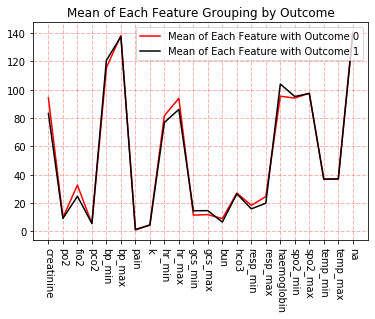

In [251]:
visualize_feature_mean(mean_df)

In [252]:
std_df = pd.DataFrame({
    'class0':[76.9,3.7,14.6,1.2,23.3,24.7,2.1,0.4,15.6,18.4,4.1,3.8,5.7,3.4,5.9,6.8,17.2,4,2.3,1.1,0.7,5.3],
    'class1':[68.3,4.1,14.1,1,23.5,23.6,2.1,0.5,14.9,16,1.4,1.2,4.5,2.8,4.4,5.1,18.9,2.9,2.2,1.3,1,4.2]
},index = ['creatinine','po2','fio2','pco2','bp_min','bp_max','pain','k','hr_min','hr_max','gcs_min','gcs_max','bun','hco3','resp_min','resp_max','haemoglobin','spo2_min','spo2_max','temp_min','temp_max','na'])

In [253]:
def visualize_feature_std(std_df):
    x_data=['creatinine','po2','fio2','pco2','bp_min','bp_max','pain','k','hr_min','hr_max','gcs_min','gcs_max','bun','hco3','resp_min','resp_max','haemoglobin','spo2_min','spo2_max','temp_min','temp_max','na']
    class0_data=std_df.iloc[:,0:1]
    class1_data=std_df.iloc[:,1:2]
    
    plt.title('Mean of Each Feature Grouping by Outcome')
    
    plt.plot(x_data, class0_data, 'r', label = 'Std of Each Feature with Outcome 0' )
    plt.plot(x_data, class1_data, 'black', label = 'Std of Each Feature with Outcome 1')
    plt.legend(loc='upper right')
    
    plt.xticks(rotation=-90)
    plt.grid(b=True, 
         color='r', 
         linestyle='--', 
         linewidth=1, 
         alpha=0.3, 
         axis='both',
         which="major")
    plt.show()

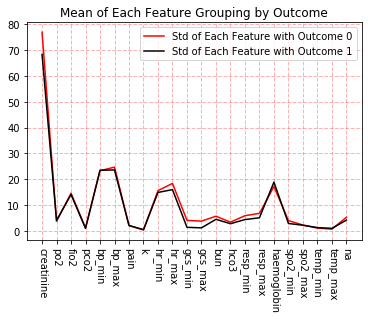

In [254]:
visualize_feature_std(std_df)

In [255]:
test_data=np.column_stack((xtest,ytest))

In [256]:
creatinine_groups=[59,83]
creatinine_grouping=fatf_data_tools.group_by_column(test_data, creatinine_index, groupings=creatinine_groups)
creatinine_grouping[1]

['x <= 59', '59 < x <= 83', '83 < x']

In [257]:
len(creatinine_grouping[0][0])

261

In [258]:
len(creatinine_grouping[0][1])

267

In [259]:
len(creatinine_grouping[0][2])

278

In [260]:
import fatf.accountability.data.measures as fatf_accountability_data
counts_per_grouping = [len(i) for i in creatinine_grouping[0]]
fatf_accountability_data.sampling_bias_grid_check(counts_per_grouping)

array([[False, False, False],
       [False, False, False],
       [False, False, False]])

In [261]:
import fatf.utils.metrics.tools as fatf_metrics_tools
target_grid=ytest.to_numpy()
grouping_cm = fatf_metrics_tools.confusion_matrix_per_subgroup_indexed(creatinine_grouping[0], 
                      target_grid, rgrid_pred,labels=np.unique(target_grid).tolist())

In [262]:
import fatf.utils.metrics.metrics as fatf_metrics
group_0_acc = fatf_metrics.accuracy(grouping_cm[0])
group_0_acc

0.8160919540229885

In [263]:
group_1_acc = fatf_metrics.accuracy(grouping_cm[1])
group_1_acc

0.7865168539325843

In [264]:
group_2_acc = fatf_metrics.accuracy(grouping_cm[2])
group_2_acc

0.7949640287769785

In [265]:
import fatf.accountability.models.measures as fatf_accountability_models

fatf_accountability_models.systematic_performance_bias_grid([group_0_acc, group_1_acc, group_2_acc])

array([[False, False, False],
       [False, False, False],
       [False, False, False]])

In [274]:
po2_groups=[8.9,10.2]
po2_grouping=fatf_data_tools.group_by_column(test_data, po2_index, groupings=po2_groups)
po2_grouping[1]
print(len(po2_grouping[0][0]))
print(len(po2_grouping[0][1]))
print(len(po2_grouping[0][2]))

271
259
276


In [276]:
grouping_cm = fatf_metrics_tools.confusion_matrix_per_subgroup_indexed(po2_grouping[0], 
                      target_grid, rgrid_pred,labels=np.unique(target_grid).tolist())
group_0_acc = fatf_metrics.accuracy(grouping_cm[0])
group_1_acc = fatf_metrics.accuracy(grouping_cm[1])
group_2_acc = fatf_metrics.accuracy(grouping_cm[2])
fatf_accountability_models.systematic_performance_bias_grid([group_0_acc, group_1_acc, group_2_acc])

array([[False, False, False],
       [False, False, False],
       [False, False, False]])

In [293]:
fio2_groups=[28,29.8]
fio2_grouping=fatf_data_tools.group_by_column(test_data, fio2_index, groupings=fio2_groups)
fio2_grouping[1]
print(len(fio2_grouping[0][0]))
print(len(fio2_grouping[0][1]))
print(len(fio2_grouping[0][2]))

315
226
265


In [294]:
grouping_cm = fatf_metrics_tools.confusion_matrix_per_subgroup_indexed(fio2_grouping[0], 
                      target_grid, rgrid_pred,labels=np.unique(target_grid).tolist())
group_0_acc = fatf_metrics.accuracy(grouping_cm[0])
group_1_acc = fatf_metrics.accuracy(grouping_cm[1])
group_2_acc = fatf_metrics.accuracy(grouping_cm[2])
fatf_accountability_models.systematic_performance_bias_grid([group_0_acc, group_1_acc, group_2_acc])

array([[False, False, False],
       [False, False, False],
       [False, False, False]])

In [303]:
pco2_groups=[5,5.8]
pco2_grouping=fatf_data_tools.group_by_column(test_data, pco2_index, groupings=pco2_groups)
pco2_grouping[1]
print(len(pco2_grouping[0][0]))
print(len(pco2_grouping[0][1]))
print(len(pco2_grouping[0][2]))

256
288
262


In [304]:
grouping_cm = fatf_metrics_tools.confusion_matrix_per_subgroup_indexed(pco2_grouping[0], 
                      target_grid, rgrid_pred,labels=np.unique(target_grid).tolist())
group_0_acc = fatf_metrics.accuracy(grouping_cm[0])
group_1_acc = fatf_metrics.accuracy(grouping_cm[1])
group_2_acc = fatf_metrics.accuracy(grouping_cm[2])
fatf_accountability_models.systematic_performance_bias_grid([group_0_acc, group_1_acc, group_2_acc])

array([[False, False, False],
       [False, False, False],
       [False, False, False]])

In [309]:
bpmin_groups=[105,123]
bpmin_grouping=fatf_data_tools.group_by_column(test_data, 4, groupings=bpmin_groups)
bpmin_grouping[1]
print(len(bpmin_grouping[0][0]))
print(len(bpmin_grouping[0][1]))
print(len(bpmin_grouping[0][2]))

272
261
273


In [310]:
grouping_cm = fatf_metrics_tools.confusion_matrix_per_subgroup_indexed(bpmin_grouping[0], 
                      target_grid, rgrid_pred,labels=np.unique(target_grid).tolist())
group_0_acc = fatf_metrics.accuracy(grouping_cm[0])
group_1_acc = fatf_metrics.accuracy(grouping_cm[1])
group_2_acc = fatf_metrics.accuracy(grouping_cm[2])
fatf_accountability_models.systematic_performance_bias_grid([group_0_acc, group_1_acc, group_2_acc])

array([[False, False, False],
       [False, False, False],
       [False, False, False]])

In [319]:
pain_groups=[1,2]
pain_grouping=fatf_data_tools.group_by_column(test_data, 6, groupings=pain_groups)
pain_grouping[1]
print(len(pain_grouping[0][0]))
print(len(pain_grouping[0][1]))
print(len(pain_grouping[0][2]))

502
158
146


In [320]:
grouping_cm = fatf_metrics_tools.confusion_matrix_per_subgroup_indexed(pain_grouping[0], 
                      target_grid, rgrid_pred,labels=np.unique(target_grid).tolist())
group_0_acc = fatf_metrics.accuracy(grouping_cm[0])
group_1_acc = fatf_metrics.accuracy(grouping_cm[1])
group_2_acc = fatf_metrics.accuracy(grouping_cm[2])
fatf_accountability_models.systematic_performance_bias_grid([group_0_acc, group_1_acc, group_2_acc])

array([[False, False, False],
       [False, False, False],
       [False, False, False]])

In [327]:
k_groups=[4.3,4.6]
k_grouping=fatf_data_tools.group_by_column(test_data, 7, groupings=k_groups)
k_grouping[1]
print(len(k_grouping[0][0]))
print(len(k_grouping[0][1]))
print(len(k_grouping[0][2]))

250
245
311


In [328]:
grouping_cm = fatf_metrics_tools.confusion_matrix_per_subgroup_indexed(k_grouping[0], 
                      target_grid, rgrid_pred,labels=np.unique(target_grid).tolist())
group_0_acc = fatf_metrics.accuracy(grouping_cm[0])
group_1_acc = fatf_metrics.accuracy(grouping_cm[1])
group_2_acc = fatf_metrics.accuracy(grouping_cm[2])
fatf_accountability_models.systematic_performance_bias_grid([group_0_acc, group_1_acc, group_2_acc])

array([[False, False, False],
       [False, False, False],
       [False, False, False]])

In [331]:
hrmin_groups=[70,85]
hrmin_grouping=fatf_data_tools.group_by_column(test_data, 8, groupings=hrmin_groups)
hrmin_grouping[1]
print(len(hrmin_grouping[0][0]))
print(len(hrmin_grouping[0][1]))
print(len(hrmin_grouping[0][2]))
grouping_cm = fatf_metrics_tools.confusion_matrix_per_subgroup_indexed(hrmin_grouping[0], 
                      target_grid, rgrid_pred,labels=np.unique(target_grid).tolist())
group_0_acc = fatf_metrics.accuracy(grouping_cm[0])
group_1_acc = fatf_metrics.accuracy(grouping_cm[1])
group_2_acc = fatf_metrics.accuracy(grouping_cm[2])
fatf_accountability_models.systematic_performance_bias_grid([group_0_acc, group_1_acc, group_2_acc])

229
303
274


array([[False, False, False],
       [False, False, False],
       [False, False, False]])

In [339]:
gcs_groups=[14]
gcs_grouping=fatf_data_tools.group_by_column(test_data, 10, groupings=gcs_groups)
gcs_grouping[1]
print(len(gcs_grouping[0][0]))
print(len(gcs_grouping[0][1]))
grouping_cm = fatf_metrics_tools.confusion_matrix_per_subgroup_indexed(gcs_grouping[0], 
                      target_grid, rgrid_pred,labels=np.unique(target_grid).tolist())
group_0_acc = fatf_metrics.accuracy(grouping_cm[0])
group_1_acc = fatf_metrics.accuracy(grouping_cm[1])
fatf_accountability_models.systematic_performance_bias_grid([group_0_acc, group_1_acc])

332
474


array([[False, False],
       [False, False]])

In [341]:
bun_groups=[5,9]
bun_grouping=fatf_data_tools.group_by_column(test_data, 12, groupings=bun_groups)
bun_grouping[1]
print(len(bun_grouping[0][0]))
print(len(bun_grouping[0][1]))
print(len(bun_grouping[0][2]))
grouping_cm = fatf_metrics_tools.confusion_matrix_per_subgroup_indexed(bun_grouping[0], 
                      target_grid, rgrid_pred,labels=np.unique(target_grid).tolist())
group_0_acc = fatf_metrics.accuracy(grouping_cm[0])
group_1_acc = fatf_metrics.accuracy(grouping_cm[1])
group_2_acc = fatf_metrics.accuracy(grouping_cm[2])
fatf_accountability_models.systematic_performance_bias_grid([group_0_acc, group_1_acc, group_2_acc])

240
312
254


array([[False, False, False],
       [False, False, False],
       [False, False, False]])

In [348]:
hco3_groups=[25.5,27.4]
hco3_grouping=fatf_data_tools.group_by_column(test_data, 13, groupings=hco3_groups)
hco3_grouping[1]
print(len(hco3_grouping[0][0]))
print(len(hco3_grouping[0][1]))
print(len(hco3_grouping[0][2]))
grouping_cm = fatf_metrics_tools.confusion_matrix_per_subgroup_indexed(hco3_grouping[0], 
                      target_grid, rgrid_pred,labels=np.unique(target_grid).tolist())
group_0_acc = fatf_metrics.accuracy(grouping_cm[0])
group_1_acc = fatf_metrics.accuracy(grouping_cm[1])
group_2_acc = fatf_metrics.accuracy(grouping_cm[2])
fatf_accountability_models.systematic_performance_bias_grid([group_0_acc, group_1_acc, group_2_acc])

277
260
269


array([[False, False, False],
       [False, False, False],
       [False, False, False]])

In [352]:
resp_groups=[15,19]
resp_grouping=fatf_data_tools.group_by_column(test_data, 15, groupings=resp_groups)
resp_grouping[1]
print(len(resp_grouping[0][0]))
print(len(resp_grouping[0][1]))
print(len(resp_grouping[0][2]))
grouping_cm = fatf_metrics_tools.confusion_matrix_per_subgroup_indexed(resp_grouping[0], 
                      target_grid, rgrid_pred,labels=np.unique(target_grid).tolist())
group_0_acc = fatf_metrics.accuracy(grouping_cm[0])
group_1_acc = fatf_metrics.accuracy(grouping_cm[1])
group_2_acc = fatf_metrics.accuracy(grouping_cm[2])
fatf_accountability_models.systematic_performance_bias_grid([group_0_acc, group_1_acc, group_2_acc])

277
278
251


array([[False, False, False],
       [False, False, False],
       [False, False, False]])

In [355]:
haemo_groups=[90,105]
haemo_grouping=fatf_data_tools.group_by_column(test_data, 17, groupings=haemo_groups)
haemo_grouping[1]
print(len(haemo_grouping[0][0]))
print(len(haemo_grouping[0][1]))
print(len(haemo_grouping[0][2]))
grouping_cm = fatf_metrics_tools.confusion_matrix_per_subgroup_indexed(haemo_grouping[0], 
                      target_grid, rgrid_pred,labels=np.unique(target_grid).tolist())
group_0_acc = fatf_metrics.accuracy(grouping_cm[0])
group_1_acc = fatf_metrics.accuracy(grouping_cm[1])
group_2_acc = fatf_metrics.accuracy(grouping_cm[2])
fatf_accountability_models.systematic_performance_bias_grid([group_0_acc, group_1_acc, group_2_acc])

273
280
253


array([[False, False, False],
       [False, False, False],
       [False, False, False]])

In [358]:
spo2_groups=[93,95]
spo2_grouping=fatf_data_tools.group_by_column(test_data, 18, groupings=spo2_groups)
spo2_grouping[1]
print(len(spo2_grouping[0][0]))
print(len(spo2_grouping[0][1]))
print(len(spo2_grouping[0][2]))
grouping_cm = fatf_metrics_tools.confusion_matrix_per_subgroup_indexed(spo2_grouping[0], 
                      target_grid, rgrid_pred,labels=np.unique(target_grid).tolist())
group_0_acc = fatf_metrics.accuracy(grouping_cm[0])
group_1_acc = fatf_metrics.accuracy(grouping_cm[1])
group_2_acc = fatf_metrics.accuracy(grouping_cm[2])
fatf_accountability_models.systematic_performance_bias_grid([group_0_acc, group_1_acc, group_2_acc])

234
257
315


array([[False, False, False],
       [False, False, False],
       [False, False, False]])

In [361]:
temp_groups=[36.6,37.2]
temp_grouping=fatf_data_tools.group_by_column(test_data, 20, groupings=temp_groups)
temp_grouping[1]
print(len(temp_grouping[0][0]))
print(len(temp_grouping[0][1]))
print(len(temp_grouping[0][2]))
grouping_cm = fatf_metrics_tools.confusion_matrix_per_subgroup_indexed(temp_grouping[0], 
                      target_grid, rgrid_pred,labels=np.unique(target_grid).tolist())
group_0_acc = fatf_metrics.accuracy(grouping_cm[0])
group_1_acc = fatf_metrics.accuracy(grouping_cm[1])
group_2_acc = fatf_metrics.accuracy(grouping_cm[2])
fatf_accountability_models.systematic_performance_bias_grid([group_0_acc, group_1_acc, group_2_acc])

245
309
252


array([[False, False, False],
       [False, False, False],
       [False, False, False]])

In [365]:
na_groups=[138,141]
na_grouping=fatf_data_tools.group_by_column(test_data, 22, groupings=na_groups)
na_grouping[1]
print(len(na_grouping[0][0]))
print(len(na_grouping[0][1]))
print(len(na_grouping[0][2]))
grouping_cm = fatf_metrics_tools.confusion_matrix_per_subgroup_indexed(na_grouping[0], 
                      target_grid, rgrid_pred,labels=np.unique(target_grid).tolist())
group_0_acc = fatf_metrics.accuracy(grouping_cm[0])
group_1_acc = fatf_metrics.accuracy(grouping_cm[1])
group_2_acc = fatf_metrics.accuracy(grouping_cm[2])
fatf_accountability_models.systematic_performance_bias_grid([group_0_acc, group_1_acc, group_2_acc])

308
251
247


array([[False, False, False],
       [False, False, False],
       [False, False, False]])

In [367]:
datasetG = pd.read_csv("dataset.csv")

In [368]:
import fatf.utils.data.tools as fatf_data_tools
gender_index=25
gender_grouping = fatf_data_tools.group_by_column(datasetG.to_numpy(), gender_index,treat_as_categorical=True)
gender_grouping[1]

['(0.0,)', '(1.0,)']

In [369]:
gender_target0 = y[gender_grouping[0][0]]
gender_target0_counts = np.unique(gender_target0, return_counts=True) 
gender_target0_counts

(array([0., 1.]), array([1055,  875]))

In [371]:
gender_target1 = y[gender_grouping[0][1]]
gender_target1_counts = np.unique(gender_target1, return_counts=True)
gender_target1_counts

(array([0., 1.]), array([1101,  926]))

In [373]:
gender0_fail_ratio = gender_target0_counts[1][0]/gender_target0_counts[1].sum()
gender0_fail_ratio

0.5466321243523317

In [374]:
gender1_fail_ratio = gender_target1_counts[1][0]/gender_target1_counts[1].sum()
gender1_fail_ratio

0.5431672422298964

In [589]:
predictions=rf_random.predict(x)
cm2 = confusion_matrix(y,predictions)
print ("Randomized GSCV Confusion Matrix: \n", cm2)
print ("Randomized GSCV Accuracy(whole dataset): ", accuracy_score(y, predictions))

Randomized GSCV Confusion Matrix: 
 [[2042  114]
 [  93 1708]]
Randomized GSCV Accuracy(whole dataset):  0.9476876421531463


In [591]:
import fatf.utils.metrics.tools as fatf_metric_tools
import fatf.utils.metrics.metrics as fatf_performance_metrics

airway_cm = fatf_metric_tools.confusion_matrix_per_subgroup_indexed(airway_grouping[0],y.to_numpy(),predictions,labels=np.unique(y.to_numpy()).tolist())

In [592]:
fatf_performance_metrics.accuracy(airway_cm[0])

0.9392405063291139

In [593]:
fatf_performance_metrics.accuracy(airway_cm[1])

0.9672818791946308

In [594]:
import fatf.fairness.models.measures as fatf_fairness_models
airway_equal_accuracy = fatf_fairness_models.equal_accuracy(airway_cm)
fatf_fairness_models.disparate_impact_check(airway_equal_accuracy)

False

In [595]:
airway_equal_opportunity = fatf_fairness_models.equal_opportunity(airway_cm)
>>> fatf_fairness_models.disparate_impact_check(airway_equal_opportunity)

False

In [596]:
airway_demographic_parity = fatf_fairness_models.demographic_parity(airway_cm)
fatf_fairness_models.disparate_impact_check(airway_demographic_parity)

False

In [414]:
indices_data_eval = (list(range(123, 126))+list(range(128, 130))+list(range(365, 367))+list(range(369, 370))+list(range(604, 607))+list(range(608, 611))+list(range(613, 614))+list(range(120, 123))+list(range(126, 128)) + list(range(360, 365))+list(range(367, 369)) + list(range(607, 608))+list(range(611, 613)))
len(indices_data_eval)

30

In [415]:
data_eval = xtest.to_numpy()[indices_data_eval, :]
target_eval = ytest.to_numpy()[indices_data_eval]

In [416]:
np.unique(target_eval, return_counts=True)

(array([0., 1.]), array([15, 15]))

In [417]:
print(target_eval)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [418]:
import fatf.transparency.models.feature_influence as fatf_fi
rf_FAT = RandomForestClassifier(n_estimators=1200,min_samples_split=2,min_samples_leaf=4,max_features='auto',max_depth=None,bootstrap=False,random_state=0)
rf_FAT.fit(xtrain,ytrain)
ice_array, ice_linspace = fatf_fi.individual_conditional_expectation( data_eval, rf_FAT, creatinine_index, steps_number=50)

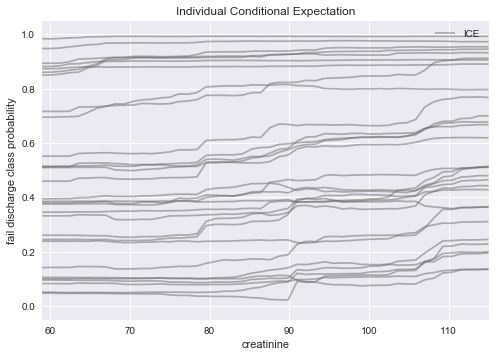

In [458]:
import fatf.vis.feature_influence as fatf_vis_fi
target0_class_index=0
target0_class_name='fail discharge'
ice_plot = fatf_vis_fi.plot_individual_conditional_expectation(ice_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='creatinine')

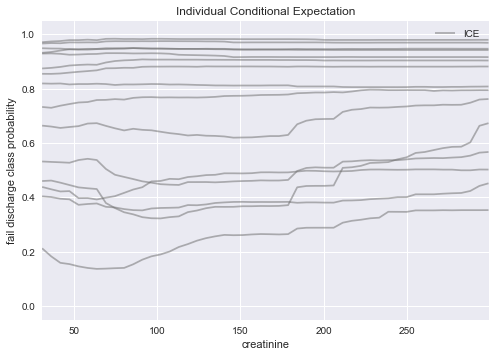

In [420]:

ice_plot_0 = fatf_vis_fi.plot_individual_conditional_expectation(ice_array[0:15,:,:],ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='creatinine')



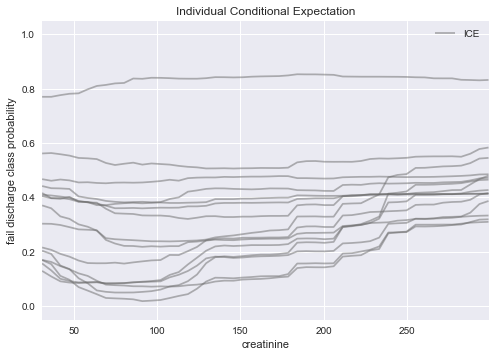

In [421]:
target1_class_index=1
ice_plot_1= fatf_vis_fi.plot_individual_conditional_expectation(ice_array[15:30,:,:],ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='creatinine')

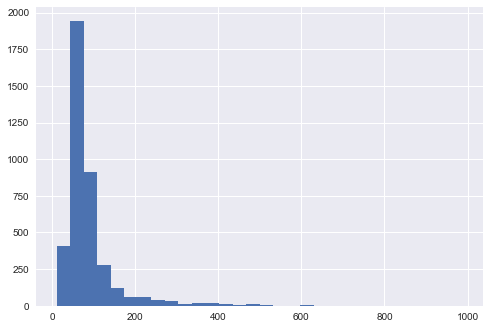

In [652]:
hist_plot = plt.figure()
hist = plt.hist(dataset.to_numpy()[:, creatinine_index], bins=30)

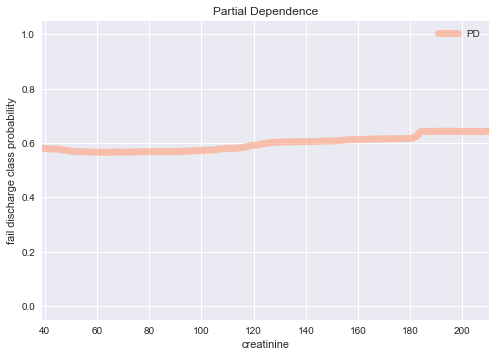

In [654]:
pd_array = fatf_fi.partial_dependence_ice(ice_array)
pd_plot = fatf_vis_fi.plot_partial_dependence(pd_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='creatinine')

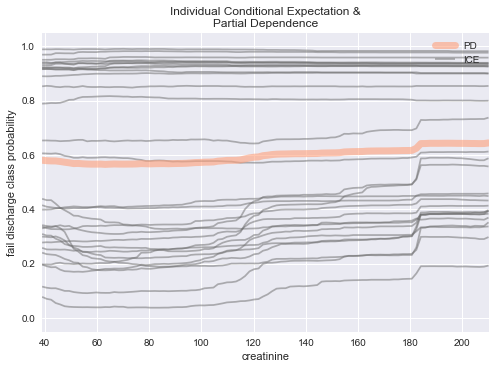

In [656]:
ice_re_plot=fatf_vis_fi.plot_individual_conditional_expectation(ice_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='creatinine')
ice_re_plot_figure, ice_re_plot_axis = ice_re_plot
pd_re_plot = fatf_vis_fi.plot_partial_dependence(pd_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='creatinine',plot_axis=ice_re_plot_axis)





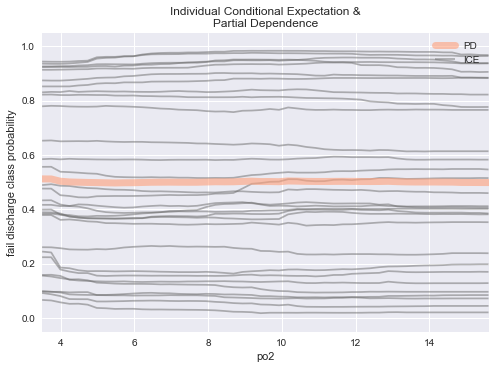

In [432]:

ice_array, ice_linspace = fatf_fi.individual_conditional_expectation( data_eval, rf_FAT, po2_index, steps_number=50)
pd_array = fatf_fi.partial_dependence_ice(ice_array)
ice_re_plot=fatf_vis_fi.plot_individual_conditional_expectation(ice_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='po2')
ice_re_plot_figure, ice_re_plot_axis = ice_re_plot
pd_re_plot = fatf_vis_fi.plot_partial_dependence(pd_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='po2',plot_axis=ice_re_plot_axis)


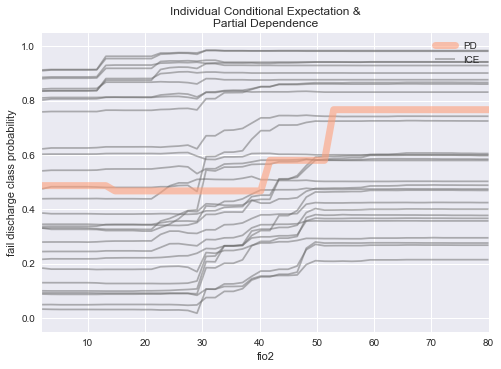

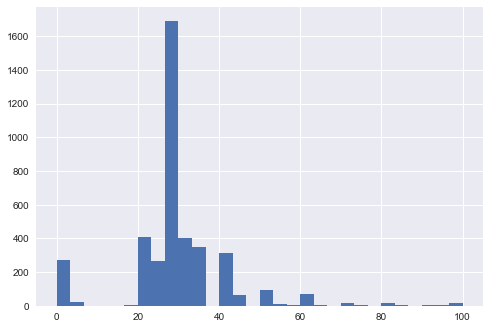

In [489]:
pd_array = fatf_fi.partial_dependence_ice(ice_array)
ice_array, ice_linspace = fatf_fi.individual_conditional_expectation( data_eval, rf_FAT, fio2_index, steps_number=50)
ice_re_plot=fatf_vis_fi.plot_individual_conditional_expectation(ice_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='fio2')
ice_re_plot_figure, ice_re_plot_axis = ice_re_plot
pd_re_plot = fatf_vis_fi.plot_partial_dependence(pd_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='fio2',plot_axis=ice_re_plot_axis)

hist_plot = plt.figure()
hist = plt.hist(dataset.to_numpy()[:, fio2_index], bins=30)

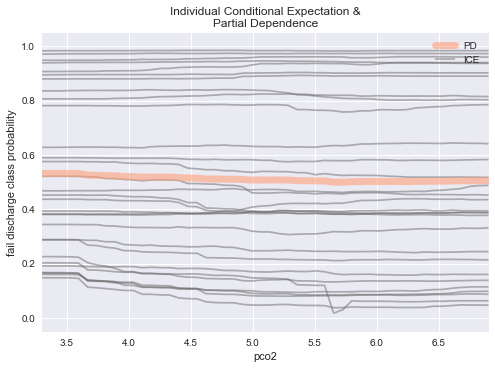

In [431]:

ice_array, ice_linspace = fatf_fi.individual_conditional_expectation( data_eval, rf_FAT, pco2_index, steps_number=50)
pd_array = fatf_fi.partial_dependence_ice(ice_array)
ice_re_plot=fatf_vis_fi.plot_individual_conditional_expectation(ice_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='pco2')
ice_re_plot_figure, ice_re_plot_axis = ice_re_plot
pd_re_plot = fatf_vis_fi.plot_partial_dependence(pd_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='pco2',plot_axis=ice_re_plot_axis)


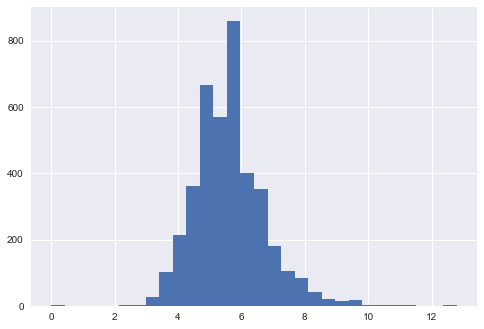

In [490]:
hist_plot = plt.figure()
hist = plt.hist(dataset.to_numpy()[:, pco2_index], bins=30)

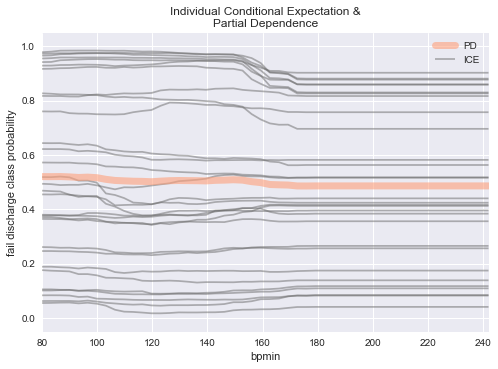

In [433]:
bpmin_index=4
ice_array, ice_linspace = fatf_fi.individual_conditional_expectation( data_eval, rf_FAT, bpmin_index, steps_number=50)
pd_array = fatf_fi.partial_dependence_ice(ice_array)
ice_re_plot=fatf_vis_fi.plot_individual_conditional_expectation(ice_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='bpmin')
ice_re_plot_figure, ice_re_plot_axis = ice_re_plot
pd_re_plot = fatf_vis_fi.plot_partial_dependence(pd_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='bpmin',plot_axis=ice_re_plot_axis)


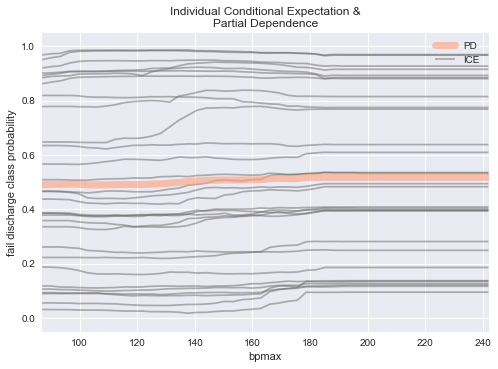

In [434]:
bpmax_index=5
ice_array, ice_linspace = fatf_fi.individual_conditional_expectation( data_eval, rf_FAT, bpmax_index, steps_number=50)
pd_array = fatf_fi.partial_dependence_ice(ice_array)
ice_re_plot=fatf_vis_fi.plot_individual_conditional_expectation(ice_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='bpmax')
ice_re_plot_figure, ice_re_plot_axis = ice_re_plot
pd_re_plot = fatf_vis_fi.plot_partial_dependence(pd_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='bpmax',plot_axis=ice_re_plot_axis)


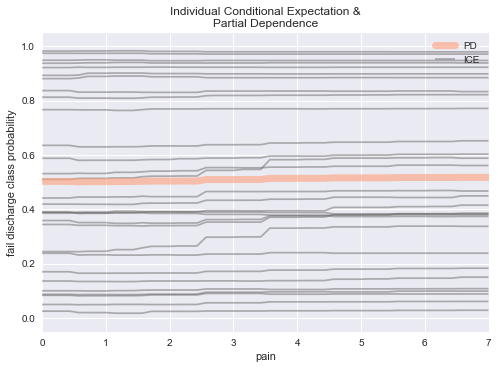

In [435]:

ice_array, ice_linspace = fatf_fi.individual_conditional_expectation( data_eval, rf_FAT, pain_index, steps_number=50)
pd_array = fatf_fi.partial_dependence_ice(ice_array)
ice_re_plot=fatf_vis_fi.plot_individual_conditional_expectation(ice_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='pain')
ice_re_plot_figure, ice_re_plot_axis = ice_re_plot
pd_re_plot = fatf_vis_fi.plot_partial_dependence(pd_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='pain',plot_axis=ice_re_plot_axis)


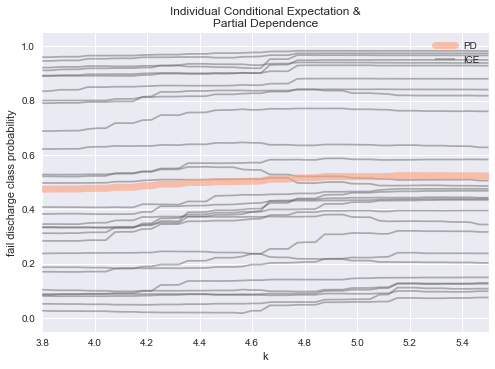

In [436]:

ice_array, ice_linspace = fatf_fi.individual_conditional_expectation( data_eval, rf_FAT, k_index, steps_number=50)
pd_array = fatf_fi.partial_dependence_ice(ice_array)
ice_re_plot=fatf_vis_fi.plot_individual_conditional_expectation(ice_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='k')
ice_re_plot_figure, ice_re_plot_axis = ice_re_plot
pd_re_plot = fatf_vis_fi.plot_partial_dependence(pd_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='k',plot_axis=ice_re_plot_axis)


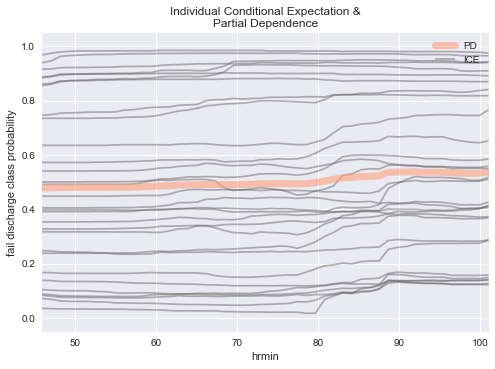

In [437]:
hrmin_index=8
ice_array, ice_linspace = fatf_fi.individual_conditional_expectation( data_eval, rf_FAT, hrmin_index, steps_number=50)
pd_array = fatf_fi.partial_dependence_ice(ice_array)
ice_re_plot=fatf_vis_fi.plot_individual_conditional_expectation(ice_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='hrmin')
ice_re_plot_figure, ice_re_plot_axis = ice_re_plot
pd_re_plot = fatf_vis_fi.plot_partial_dependence(pd_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='hrmin',plot_axis=ice_re_plot_axis)


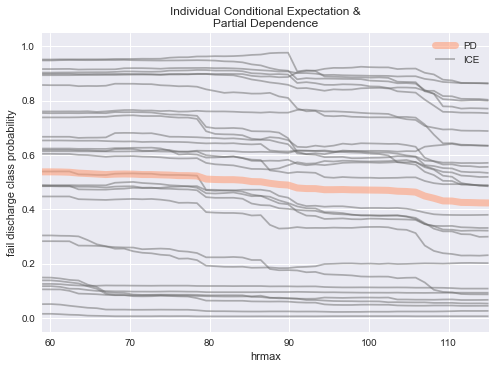

In [456]:
hrmax_index=9
ice_array, ice_linspace = fatf_fi.individual_conditional_expectation( data_eval, rf_FAT, hrmax_index, steps_number=50)
pd_array = fatf_fi.partial_dependence_ice(ice_array)
ice_re_plot=fatf_vis_fi.plot_individual_conditional_expectation(ice_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='hrmax')
ice_re_plot_figure, ice_re_plot_axis = ice_re_plot
pd_re_plot = fatf_vis_fi.plot_partial_dependence(pd_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='hrmax',plot_axis=ice_re_plot_axis)


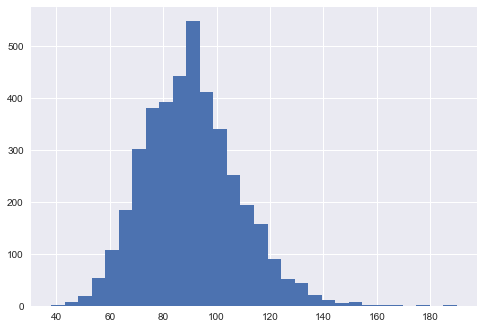

In [493]:
hist_plot = plt.figure()
hist = plt.hist(dataset.to_numpy()[:, hrmax_index], bins=30)

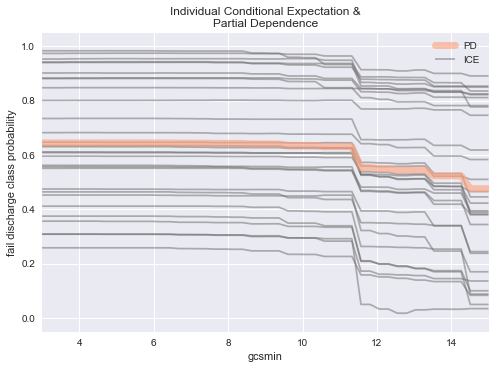

In [439]:
gcsmin_index=10
ice_array, ice_linspace = fatf_fi.individual_conditional_expectation( data_eval, rf_FAT, gcsmin_index, steps_number=50)
pd_array = fatf_fi.partial_dependence_ice(ice_array)
ice_re_plot=fatf_vis_fi.plot_individual_conditional_expectation(ice_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='gcsmin')
ice_re_plot_figure, ice_re_plot_axis = ice_re_plot
pd_re_plot = fatf_vis_fi.plot_partial_dependence(pd_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='gcsmin',plot_axis=ice_re_plot_axis)


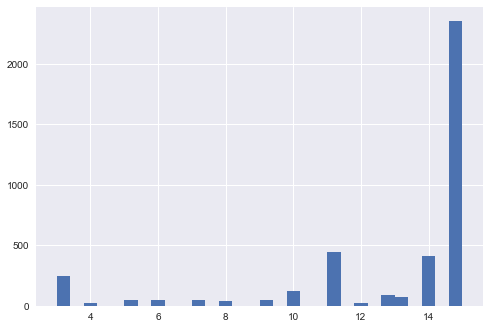

In [494]:
hist_plot = plt.figure()
hist = plt.hist(dataset.to_numpy()[:, gcsmin_index], bins=30)

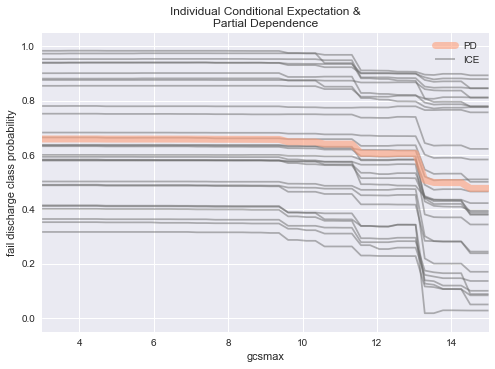

In [440]:
gcsmax_index=11
ice_array, ice_linspace = fatf_fi.individual_conditional_expectation( data_eval, rf_FAT, gcsmax_index, steps_number=50)
pd_array = fatf_fi.partial_dependence_ice(ice_array)
ice_re_plot=fatf_vis_fi.plot_individual_conditional_expectation(ice_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='gcsmax')
ice_re_plot_figure, ice_re_plot_axis = ice_re_plot
pd_re_plot = fatf_vis_fi.plot_partial_dependence(pd_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='gcsmax',plot_axis=ice_re_plot_axis)


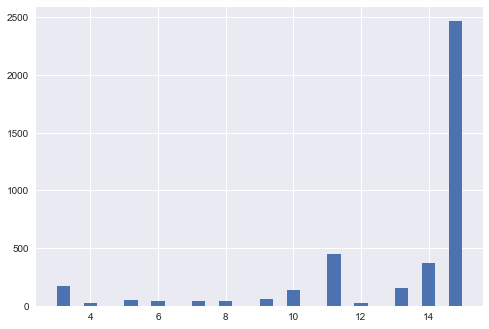

In [495]:
hist_plot = plt.figure()
hist = plt.hist(dataset.to_numpy()[:, gcsmax_index], bins=30)

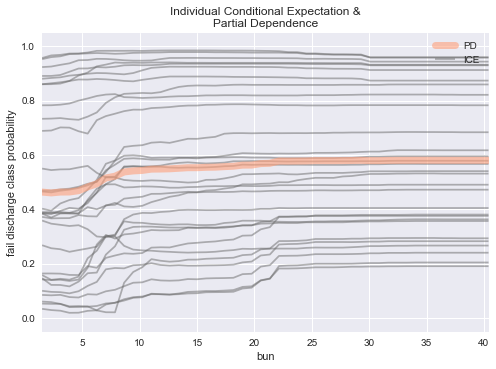

In [441]:

ice_array, ice_linspace = fatf_fi.individual_conditional_expectation( data_eval, rf_FAT, bun_index, steps_number=50)
pd_array = fatf_fi.partial_dependence_ice(ice_array)
ice_re_plot=fatf_vis_fi.plot_individual_conditional_expectation(ice_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='bun')
ice_re_plot_figure, ice_re_plot_axis = ice_re_plot
pd_re_plot = fatf_vis_fi.plot_partial_dependence(pd_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='bun',plot_axis=ice_re_plot_axis)


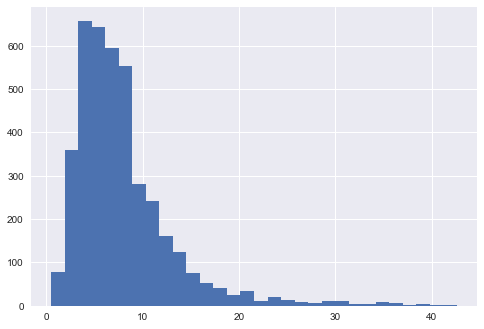

In [496]:
hist_plot = plt.figure()
hist = plt.hist(dataset.to_numpy()[:, bun_index], bins=30)

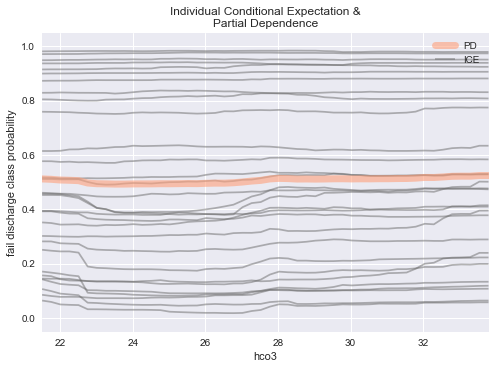

In [442]:

ice_array, ice_linspace = fatf_fi.individual_conditional_expectation( data_eval, rf_FAT, hco3_index, steps_number=50)
pd_array = fatf_fi.partial_dependence_ice(ice_array)
ice_re_plot=fatf_vis_fi.plot_individual_conditional_expectation(ice_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='hco3')
ice_re_plot_figure, ice_re_plot_axis = ice_re_plot
pd_re_plot = fatf_vis_fi.plot_partial_dependence(pd_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='hco3',plot_axis=ice_re_plot_axis)


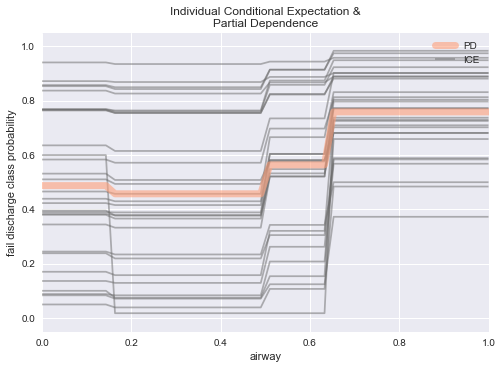

In [455]:
airway_index=14
ice_array, ice_linspace = fatf_fi.individual_conditional_expectation( data_eval, rf_FAT, airway_index, steps_number=50)
pd_array = fatf_fi.partial_dependence_ice(ice_array)
ice_re_plot=fatf_vis_fi.plot_individual_conditional_expectation(ice_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='airway')
ice_re_plot_figure, ice_re_plot_axis = ice_re_plot
pd_re_plot = fatf_vis_fi.plot_partial_dependence(pd_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='airway',plot_axis=ice_re_plot_axis)


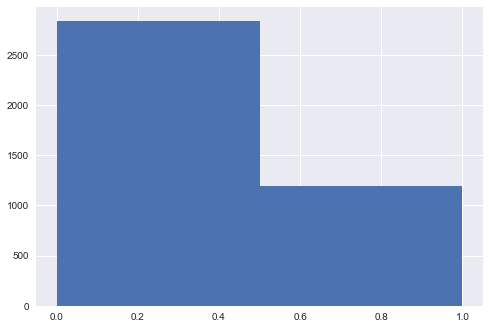

In [499]:
hist_plot = plt.figure()
hist = plt.hist(dataset.to_numpy()[:, airway_index], bins=2)

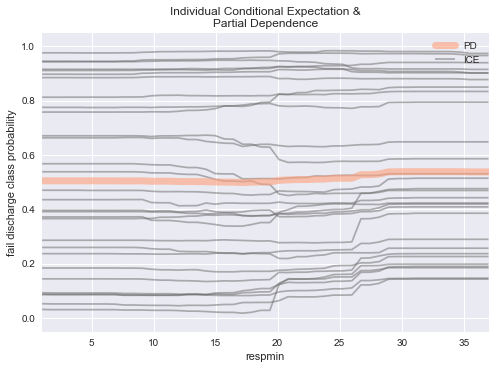

In [443]:
respmin_index=15
ice_array, ice_linspace = fatf_fi.individual_conditional_expectation( data_eval, rf_FAT, respmin_index, steps_number=50)
pd_array = fatf_fi.partial_dependence_ice(ice_array)
ice_re_plot=fatf_vis_fi.plot_individual_conditional_expectation(ice_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='respmin')
ice_re_plot_figure, ice_re_plot_axis = ice_re_plot
pd_re_plot = fatf_vis_fi.plot_partial_dependence(pd_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='respmin',plot_axis=ice_re_plot_axis)


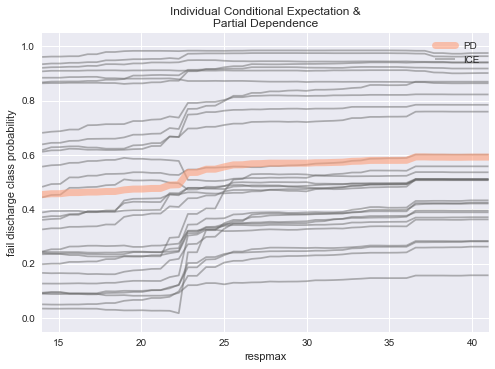

In [444]:
respmax_index=16
ice_array, ice_linspace = fatf_fi.individual_conditional_expectation( data_eval, rf_FAT, respmax_index, steps_number=50)
pd_array = fatf_fi.partial_dependence_ice(ice_array)
ice_re_plot=fatf_vis_fi.plot_individual_conditional_expectation(ice_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='respmax')
ice_re_plot_figure, ice_re_plot_axis = ice_re_plot
pd_re_plot = fatf_vis_fi.plot_partial_dependence(pd_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='respmax',plot_axis=ice_re_plot_axis)


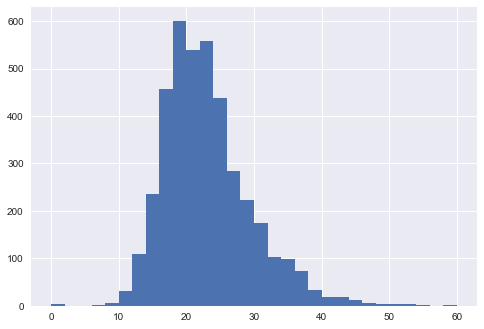

In [497]:
hist_plot = plt.figure()
hist = plt.hist(dataset.to_numpy()[:, respmax_index], bins=30)

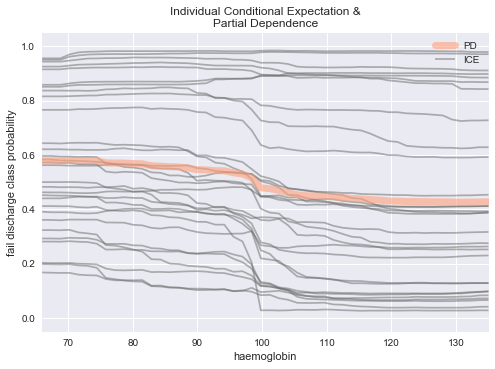

In [445]:
haemo_index=17
ice_array, ice_linspace = fatf_fi.individual_conditional_expectation( data_eval, rf_FAT, haemo_index, steps_number=50)
pd_array = fatf_fi.partial_dependence_ice(ice_array)
ice_re_plot=fatf_vis_fi.plot_individual_conditional_expectation(ice_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='haemoglobin')
ice_re_plot_figure, ice_re_plot_axis = ice_re_plot
pd_re_plot = fatf_vis_fi.plot_partial_dependence(pd_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='haemoglobin',plot_axis=ice_re_plot_axis)


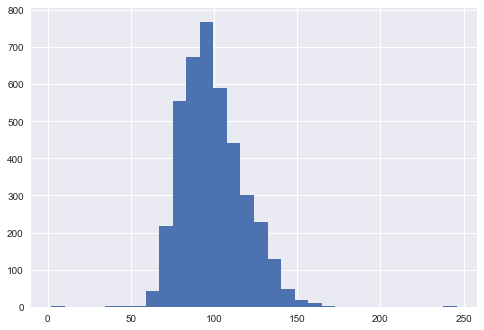

In [498]:
hist_plot = plt.figure()
hist = plt.hist(dataset.to_numpy()[:, haemo_index], bins=30)

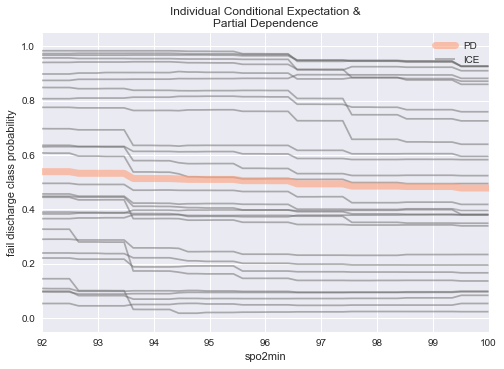

In [446]:
spo2min_index=18
ice_array, ice_linspace = fatf_fi.individual_conditional_expectation( data_eval, rf_FAT, spo2min_index, steps_number=50)
pd_array = fatf_fi.partial_dependence_ice(ice_array)
ice_re_plot=fatf_vis_fi.plot_individual_conditional_expectation(ice_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='spo2min')
ice_re_plot_figure, ice_re_plot_axis = ice_re_plot
pd_re_plot = fatf_vis_fi.plot_partial_dependence(pd_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='spo2min',plot_axis=ice_re_plot_axis)


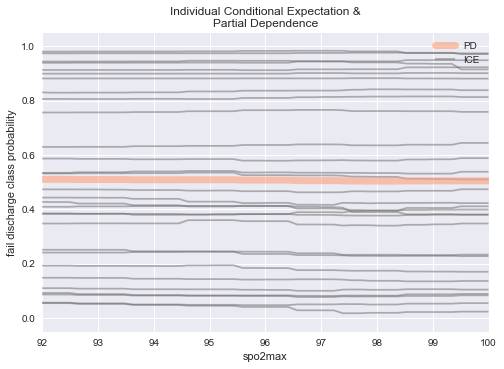

In [447]:
spo2max_index=19
ice_array, ice_linspace = fatf_fi.individual_conditional_expectation( data_eval, rf_FAT, spo2max_index, steps_number=50)
pd_array = fatf_fi.partial_dependence_ice(ice_array)
ice_re_plot=fatf_vis_fi.plot_individual_conditional_expectation(ice_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='spo2max')
ice_re_plot_figure, ice_re_plot_axis = ice_re_plot
pd_re_plot = fatf_vis_fi.plot_partial_dependence(pd_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='spo2max',plot_axis=ice_re_plot_axis)


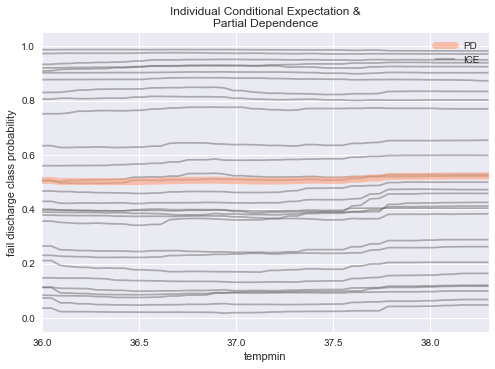

In [448]:
tempmin_index=20
ice_array, ice_linspace = fatf_fi.individual_conditional_expectation( data_eval, rf_FAT, tempmin_index, steps_number=50)
pd_array = fatf_fi.partial_dependence_ice(ice_array)
ice_re_plot=fatf_vis_fi.plot_individual_conditional_expectation(ice_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='tempmin')
ice_re_plot_figure, ice_re_plot_axis = ice_re_plot
pd_re_plot = fatf_vis_fi.plot_partial_dependence(pd_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='tempmin',plot_axis=ice_re_plot_axis)


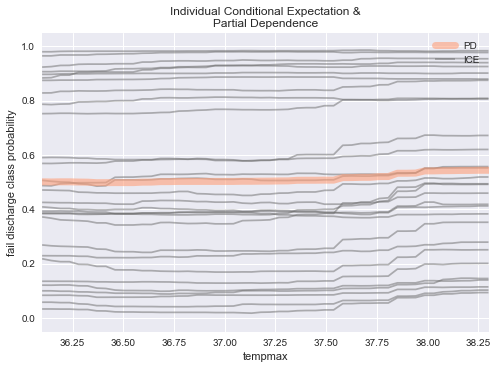

In [449]:
tempmax_index=21
ice_array, ice_linspace = fatf_fi.individual_conditional_expectation( data_eval, rf_FAT, tempmax_index, steps_number=50)
pd_array = fatf_fi.partial_dependence_ice(ice_array)
ice_re_plot=fatf_vis_fi.plot_individual_conditional_expectation(ice_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='tempmax')
ice_re_plot_figure, ice_re_plot_axis = ice_re_plot
pd_re_plot = fatf_vis_fi.plot_partial_dependence(pd_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='tempmax',plot_axis=ice_re_plot_axis)


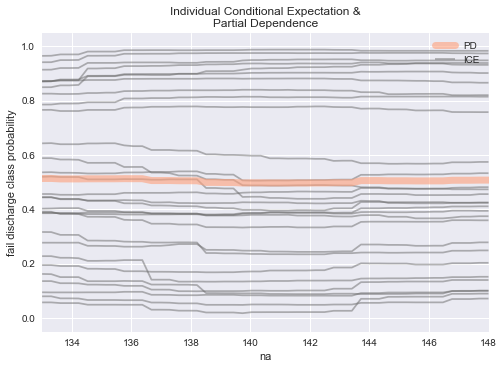

In [451]:

ice_array, ice_linspace = fatf_fi.individual_conditional_expectation( data_eval, rf_FAT, na_index, steps_number=50)
pd_array = fatf_fi.partial_dependence_ice(ice_array)
ice_re_plot=fatf_vis_fi.plot_individual_conditional_expectation(ice_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='na')
ice_re_plot_figure, ice_re_plot_axis = ice_re_plot
pd_re_plot = fatf_vis_fi.plot_partial_dependence(pd_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='na',plot_axis=ice_re_plot_axis)


In [450]:
age_index=24
ice_array, ice_linspace = fatf_fi.individual_conditional_expectation( data_eval, rf_FAT, age_index, steps_number=50)
pd_array = fatf_fi.partial_dependence_ice(ice_array)
ice_re_plot=fatf_vis_fi.plot_individual_conditional_expectation(ice_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='age')
ice_re_plot_figure, ice_re_plot_axis = ice_re_plot
pd_re_plot = fatf_vis_fi.plot_partial_dependence(pd_array,ice_linspace,target0_class_index,class_name=target0_class_name,feature_name='age',plot_axis=ice_re_plot_axis)


IndexError: Provided feature index is not valid for the input dataset.

In [525]:
target = y.to_numpy()

1.0


In [526]:
def describe_data_point(data_point_index):
...     """Prints out a data point with the specified given index."""
...     dp_to_explain = dataset.to_numpy()[data_point_index, :]
...     dp_to_explain_class_index = int(target[data_point_index])
...     target_names=['fail discharge','success discharge']
...     dp_to_explain_class = target_names[dp_to_explain_class_index]
...
...     feature_description_template = '    * {} (feature index {}): {:.1f}'
...     features_description = []
...     for i, name in enumerate(features):
...         dsc = feature_description_template.format(
...             name, i, dp_to_explain[i])
...         features_description.append(dsc)
...     features_description = ',\n'.join(features_description)
...
...     data_point_description = (
...         'The data point with index {}, of class {} '
...         'has the\nfollowing feature values:\n{}.'.format(
...             data_point_index,
...             dp_to_explain_class,
...             features_description))
...
...     print(data_point_description)

In [560]:
index_instance1 = 1600
x_instance1 = x.to_numpy()[index_instance1,:]
y_instance1 = target[index_instance1]
describe_data_point(index_instance1)

The data point with index 1600, of class success discharge has the
following feature values:
    * creatinine (feature index 0): 89.2,
    * po2 (feature index 1): 11.5,
    * fio2 (feature index 2): 28.0,
    * pco2 (feature index 3): 5.6,
    * bp_min (feature index 4): 122.0,
    * bp_max (feature index 5): 140.0,
    * pain (feature index 6): 0.0,
    * k (feature index 7): 4.6,
    * hr_min (feature index 8): 53.0,
    * hr_max (feature index 9): 56.0,
    * gcs_min (feature index 10): 15.0,
    * gcs_max (feature index 11): 15.0,
    * bun (feature index 12): 8.0,
    * hco3 (feature index 13): 28.6,
    * airway (feature index 14): 0.0,
    * resp_min (feature index 15): 12.0,
    * resp_max (feature index 16): 16.0,
    * haemoglobin (feature index 17): 99.3,
    * spo2_min (feature index 18): 96.0,
    * spo2_max (feature index 19): 98.0,
    * temp_min (feature index 20): 36.7,
    * temp_max (feature index 21): 36.7,
    * na (feature index 22): 139.9.


In [532]:
index_instance0 = 2000
x_instance0 = xtest.to_numpy()[index_instance0,:]
y_instance0 = target[index_instance0]
describe_data_point(index_instance0)

The data point with index 16, of class success discharge has the
following feature values:
    * creatinine (feature index 0): 94.0,
    * po2 (feature index 1): 4.5,
    * fio2 (feature index 2): 29.8,
    * pco2 (feature index 3): 6.7,
    * bp_min (feature index 4): 92.0,
    * bp_max (feature index 5): 131.0,
    * pain (feature index 6): 4.0,
    * k (feature index 7): 4.5,
    * hr_min (feature index 8): 59.0,
    * hr_max (feature index 9): 69.0,
    * gcs_min (feature index 10): 15.0,
    * gcs_max (feature index 11): 15.0,
    * bun (feature index 12): 4.9,
    * hco3 (feature index 13): 25.1,
    * airway (feature index 14): 0.0,
    * resp_min (feature index 15): 9.0,
    * resp_max (feature index 16): 12.0,
    * haemoglobin (feature index 17): 89.0,
    * spo2_min (feature index 18): 100.0,
    * spo2_max (feature index 19): 100.0,
    * temp_min (feature index 20): 36.7,
    * temp_max (feature index 21): 37.3,
    * na (feature index 22): 138.0.


In [561]:
import fatf.transparency.predictions.counterfactuals as fatf_cf
rf_cf_explainer = fatf_cf.CounterfactualExplainer(
model=rf_FAT,
dataset=x.to_numpy(),
categorical_indices=[],
default_numerical_step_size=0.1)

In [562]:
instance1_cfs = rf_cf_explainer.explain_instance(x_instance1)
instance1_cfs_data = instance1_cfs[0]
instance1_cfs_distances = instance1_cfs[1]
instance1_cfs_predictions = instance1_cfs[2]

In [563]:
instance1_cfs_data_around = np.around(instance1_cfs_data, decimals=2)
instance1_cfs_data_around

array([[ 89.22,  11.5 ,  28.  ,   5.6 , 122.  , 140.  ,   0.  ,   4.57,
         53.  ,  56.  ,  15.  ,  11.5 ,   7.96,  28.6 ,   0.7 ,  12.  ,
         16.  ,  99.3 ,  96.  ,  98.  ,  36.7 ,  36.7 , 139.88],
       [ 89.22,  11.5 ,  28.  ,   5.6 , 122.  , 140.  ,   0.  ,   4.57,
         53.  ,  56.  ,  10.5 ,  15.  ,   7.96,  28.6 ,   0.7 ,  12.  ,
         16.  ,  99.3 ,  96.  ,  98.  ,  36.7 ,  36.7 , 139.88],
       [ 89.22,  11.5 ,  28.  ,   5.6 , 122.  , 140.  ,   0.  ,   4.57,
         53.  ,  56.  ,  11.5 ,  13.  ,   7.96,  28.6 ,   0.  ,  12.  ,
         16.  ,  99.3 ,  96.  ,  98.  ,  36.7 ,  36.7 , 139.88],
       [ 89.22,  11.5 ,  28.  ,   5.6 , 122.  , 140.  ,   0.  ,   4.57,
         53.  ,  56.  ,  15.  ,  15.  ,   7.96,  28.6 ,   0.7 ,  12.  ,
         16.  ,  94.5 ,  96.  ,  98.  ,  36.7 ,  36.7 , 139.88],
       [ 89.22,  11.5 ,  28.  ,   5.6 , 122.  , 140.  ,   0.  ,   4.57,
         53.  ,  56.  ,  15.  ,  15.  ,   7.96,  28.6 ,   0.7 ,  12.  ,
         21.1 ,  99.

In [564]:
best_cfs_index = [0]
selected_instance1_cfs_data = instance1_cfs_data_around[best_cfs_index,:]

In [580]:
selected_instance1_cfs_predictions =instance1_cfs_predictions[best_cfs_index]
type(int(selected_instance1_cfs_predictions[0]))

int

In [581]:
selected_instance1_cfs_predictions = instance1_cfs_predictions[best_cfs_index]
selected_instance1_cfs_distances = instance1_cfs_distances[best_cfs_index]
instance1_cfs_0_text = fatf_cf.textualise_counterfactuals(
     x_instance1,
     selected_instance1_cfs_data,
     instance_class=y_instance1,
     counterfactuals_distances=selected_instance1_cfs_distances,
     counterfactuals_predictions=int(selected_instance1_cfs_predictions[0]))
    
print(instance1_cfs_0_text)

TypeError: The instance_class has to be either an integer or a string.

In [ ]:
import fatf.utils.data.density as fatf_density

dataset_density = fatf_density.DensityCheck(x.to_numpy())
instance1_cfs_density_0 = dataset_density.score_data_point(
     selected_instance1_cfs_data[0, :])
instance1_cfs_density_0

In [ ]:
instance1_density = dataset_density.score_data_point(x_instance1)
instance1_density

In [ ]:
density_scores = []
for i in x.to_numpy():
    density_score = dataset_density.score_data_point(i)
    density_scores.append(density_score)

In [ ]:
np.mean(density_scores)

In [ ]:
np.std(density_scores)